# New York City  Property Sales

### The following is all the code for the NYC - Capstone Project separated by the following sections:

##  I. Data Cleaning
#### The data is uploaded into a dataframe, inspected, and cleaned to have best possible values

## II. Data Storytelling
#### A summary of the findings of property sale data and visualizations

### III. Exploratory Data Analysis - Inferential Statistics & Machine Learning
#### Statistical tests used to understand correlations in data and explanation of predictive models used to estimate price based on a property's features

## I. Data Cleaning

In [1]:
#import modules
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [2]:
#download dataset
df = pd.read_csv('/Users/jeffreyebert/Downloads/nyc-rolling-sales.csv')

In [3]:
#change setting to view all data columns when calling df.head()
pd.set_option('display.max_columns',999)
df.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,10009,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,10009,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,10009,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [4]:
#viewing statistical iformation of numerical data columns
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [5]:
#viewing size and column categories of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

In [6]:
#drop unnecessary data columns
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('EASE-MENT',axis=1,inplace=True)
df.drop('APARTMENT NUMBER',axis=1,inplace=True)

In [7]:
#check for duplicate entries
print('There are ' + str(sum(df.duplicated(df.columns))) + ' duplicate entries in the dataset.')

There are 765 duplicate entries in the dataset.


In [8]:
#drop duplicates
df = df.drop_duplicates(df.columns, keep='last')
#view new size of df
df.shape

(83783, 19)

In [9]:
#change square footage data columns, year built, sale price to numeric data type
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['YEAR BUILT'] = pd.to_numeric(df['YEAR BUILT'])
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

#change tax class data columns, location zip columns to categorical data types
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['ZIP CODE'] = df['ZIP CODE'].astype('category')
df['BLOCK'] = df['BLOCK'].astype('category')
df['LOT'] = df['LOT'].astype('category')

#set date of sale data column to datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [10]:
#change borough index to borough names
df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'
df['BOROUGH'][df['BOROUGH'] == 2] = 'Bronx'
df['BOROUGH'][df['BOROUGH'] == 3] = 'Brooklyn'
df['BOROUGH'][df['BOROUGH'] == 4] = 'Queens'
df['BOROUGH'][df['BOROUGH'] == 5] = 'Staten Island'

In [11]:
#adding data columns for the month and season
df['Month'] = df.apply(lambda x: 'SEP' if x[-1] < datetime.strptime('2016-10-01', '%Y-%m-%d') else 'Month', axis = 1)
df['Month'] = df.apply(lambda x: 'OCT' if x[-2] < datetime.strptime('2016-11-01', '%Y-%m-%d') \
and x[-2] >= datetime.strptime('2016-10-01', '%Y-%m-%d') else x[-1], axis = 1)
df['Month'] = df.apply(lambda x: 'NOV' if x[-2] < datetime.strptime('2016-12-01', '%Y-%m-%d') \
and x[-2] >= datetime.strptime('2016-11-01', '%Y-%m-%d') else x[-1], axis = 1)
df['Month'] = df.apply(lambda x: 'DEC' if x[-2] < datetime.strptime('2017-01-01', '%Y-%m-%d') \
and x[-2] >= datetime.strptime('2016-12-01', '%Y-%m-%d') else x[-1], axis = 1)
df['Month'] = df.apply(lambda x: 'JAN' if x[-2] < datetime.strptime('2017-02-01', '%Y-%m-%d') \
and x[-2] >= datetime.strptime('2017-01-01', '%Y-%m-%d') else x[-1], axis = 1)
df['Month'] = df.apply(lambda x: 'FEB' if x[-2] < datetime.strptime('2017-03-01', '%Y-%m-%d') \
and x[-2] >= datetime.strptime('2017-02-01', '%Y-%m-%d') else x[-1], axis = 1)
df['Month'] = df.apply(lambda x: 'MAR' if x[-2] < datetime.strptime('2017-04-01', '%Y-%m-%d') \
and x[-2] >= datetime.strptime('2017-03-01', '%Y-%m-%d') else x[-1], axis = 1)
df['Month'] = df.apply(lambda x: 'APR' if x[-2] < datetime.strptime('2017-05-01', '%Y-%m-%d') \
and x[-2] >= datetime.strptime('2017-04-01', '%Y-%m-%d') else x[-1], axis = 1)
df['Month'] = df.apply(lambda x: 'MAY' if x[-2] < datetime.strptime('2017-06-01', '%Y-%m-%d') \
and x[-2] >= datetime.strptime('2017-05-01', '%Y-%m-%d') else x[-1], axis = 1)
df['Month'] = df.apply(lambda x: 'JUN' if x[-2] < datetime.strptime('2017-07-01', '%Y-%m-%d') \
and x[-2] >= datetime.strptime('2017-06-01', '%Y-%m-%d') else x[-1], axis = 1)
df['Month'] = df.apply(lambda x: 'JUL' if x[-2] < datetime.strptime('2017-08-01', '%Y-%m-%d') \
and x[-2] >= datetime.strptime('2017-07-01', '%Y-%m-%d') else x[-1], axis = 1)
df['Month'] = df.apply(lambda x: 'AUG' if x[-2] < datetime.strptime('2017-09-01', '%Y-%m-%d') \
and x[-2] >= datetime.strptime('2017-08-01', '%Y-%m-%d') else x[-1], axis = 1)
df['Season'] = df.apply(lambda x: 'Fall' if x[-1] == 'SEP' or x[-1] == 'OCT' or x[-1] == 'NOV' \
else 'Season', axis = 1)
df['Season'] = df.apply(lambda x: 'Winter' if x[-2] == 'DEC' or x[-2] == 'JAN' or x[-2] == 'FEB' \
else x[-1], axis = 1)
df['Season'] = df.apply(lambda x: 'Spring' if x[-2] == 'MAR' or x[-2] == 'APR' or x[-2] == 'MAY' \
else x[-1], axis = 1)
df['Season'] = df.apply(lambda x: 'Summer' if x[-2] == 'JUN' or x[-2] == 'JUL' or x[-2] == 'AUG' \
else x[-1], axis = 1)

In [12]:
#cleaning building class category names
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'WALKUP APARTMENTS' if x[2] == '07 RENTALS - WALKUP APARTMENTS             ' or x[2] == '09 COOPS - WALKUP APARTMENTS               ' or x[2] == '12 CONDOS - WALKUP APARTMENTS              ' else x[2], axis = 1)
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'ELEVATOR APARTMENTS' if x[2] == '08 RENTALS - ELEVATOR APARTMENTS           ' or x[2] == '10 COOPS - ELEVATOR APARTMENTS             ' or x[2] == '13 CONDOS - ELEVATOR APARTMENTS            ' else x[2], axis=1)
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'CONDO - RENTALS' if x[2] == '11A CONDO-RENTALS                           ' else x[2], axis=1)
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: '2-10 UNIT RESIDENTIAL' if x[2] == '15 CONDOS - 2-10 UNIT RESIDENTIAL          ' or x[2] == '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ' else x[2], axis = 1)
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: '4-10 UNIT RESIDENTIAL' if x[2] ==  '14 RENTALS - 4-10 UNIT                     '  else x[2], axis = 1)
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'CONDO - COOPS' if x[2] == '17 CONDO COOPS                             ' else x[2], axis = 1)                            
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'STORE BUILDINGS' if x[2] == '22 STORE BUILDINGS                         ' else x[2], axis = 1)                                          
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'RELIGIOUS FACILITIES' if x[2] ==    '37 RELIGIOUS FACILITIES                    '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'CONDO - CULTURAL/MEDICAL/EDUCATIONAL/ETC' if x[2] ==    '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC  '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'CONDO - STORE BUILDINGS' if x[2] ==    '46 CONDO STORE BUILDINGS                   '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'CONDO - NON-BUSINESS STORAGE' if x[2] ==    '47 CONDO NON-BUSINESS STORAGE              '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'ONE FAMILY DWELLINGS' if x[2] ==    '01 ONE FAMILY DWELLINGS                    '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'TWO FAMILY DWELLINGS' if x[2] ==    '02 TWO FAMILY DWELLINGS                    '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'THREE FAMILY DWELLINGS' if x[2] ==    '03 THREE FAMILY DWELLINGS                  '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'TAX CLASS 1 - CONDOS' if x[2] ==    '04 TAX CLASS 1 CONDOS                      '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'OFFICE BUILDINGS' if x[2] ==    '21 OFFICE BUILDINGS                        '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'LOFT BUILDINGS' if x[2] ==    '23 LOFT BUILDINGS                          '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'LUXURY HOTELS' if x[2] ==    '25 LUXURY HOTELS                           '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'OTHER HOTELS' if x[2] ==    '26 OTHER HOTELS                            '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'COMMERCIAL CONDOS' if x[2] ==    '28 COMMERCIAL CONDOS                       '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'COMMERCIAL GARAGES' if x[2] ==    '29 COMMERCIAL GARAGES                      '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'INDOOR PUBLIC AND CULTURAL FACILITIES' if x[2] ==    '35 INDOOR PUBLIC AND CULTURAL FACILITIES   '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'ASYLUMS AND HOMES' if x[2] ==    '38 ASYLUMS AND HOMES                       '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'CONDO - OFFICE BUILDINGS' if x[2] ==    '43 CONDO OFFICE BUILDINGS                  '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'CONDO - PARKING' if x[2] ==    '44 CONDO PARKING                           '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'CONDO - TERRACES/GARDENS/CABANAS' if x[2] ==    '48 CONDO TERRACES/GARDENS/CABANAS          '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'COMMERCIAL VACANT LAND' if x[2] ==    '31 COMMERCIAL VACANT LAND                  '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'HOSPITAL AND HEALTH FACILITIES' if x[2] ==    '32 HOSPITAL AND HEALTH FACILITIES          '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'TAX CLASS 4 - OTHER' if x[2] ==    '41 TAX CLASS 4 - OTHER                     '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'TAX CLASS 3 - UNTILITY PROPERTIES' if x[2] == '18 TAX CLASS 3 - UNTILITY PROPERTIES       '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'WAREHOUSES' if x[2] == '30 WAREHOUSES                              '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'OUTDOOR RECREATIONAL FACILITIES' if x[2] == '36 OUTDOOR RECREATIONAL FACILITIES         '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'CONDO - WAREHOUSES/FACTORY/INDUS' if x[2] == '49 CONDO WAREHOUSES/FACTORY/INDUS          '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'THEATRES' if x[2] == '34 THEATRES                                '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'FACTORIES' if x[2] == '27 FACTORIES                               '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'SELECTED GOVERNMENTAL FACILITIES' if x[2] == '40 SELECTED GOVERNMENTAL FACILITIES        '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'CONDO - HOTELS' if x[2] == '45 CONDO HOTELS                            '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'EDUCATIONAL FACILITIES' if x[2] == '33 EDUCATIONAL FACILITIES                  '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'SPECIAL CONDO BILLING LOTS' if x[2] == '11 SPECIAL CONDO BILLING LOTS              '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'TAX CLASS 1 - VACANT LAND' if x[2] == '05 TAX CLASS 1 VACANT LAND                 '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'TAX CLASS 1 - OTHER' if x[2] == '06 TAX CLASS 1 - OTHER                     '  else x[2], axis = 1)                                       
df['BUILDING CLASS CATEGORY'] = df.apply(lambda x: 'TRANSPORTATION FACILITIES' if x[2] == '39 TRANSPORTATION FACILITIES               '  else x[2], axis = 1)                                                                        

In [13]:
#checking missing values
df.columns[df.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

In [14]:
#show percentage of data values with missing values in these data columns
missing = df.isnull().sum() / len(df)
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

SALE PRICE           0.169199
LAND SQUARE FEET     0.310970
GROSS SQUARE FEET    0.326856
dtype: float64

In [15]:
#viewing which data columnc contain zero values
columns_list = df.columns.tolist()

for x in columns_list:
    if len(df[df[x] == 0]) > 0:
        print(x + ' contains data values of 0.')

ZIP CODE contains data values of 0.
RESIDENTIAL UNITS contains data values of 0.
COMMERCIAL UNITS contains data values of 0.
TOTAL UNITS contains data values of 0.
LAND SQUARE FEET contains data values of 0.
GROSS SQUARE FEET contains data values of 0.
YEAR BUILT contains data values of 0.
SALE PRICE contains data values of 0.


In [16]:
#creating dataframe that removes all null and zero values
df_n = df.copy()

df_n['SALE PRICE'] = df_n.apply(lambda x: np.nan if x[-4] == 0 else x[-4], axis = 1)
df_n['TOTAL UNITS'] = df_n.apply(lambda x: np.nan if x[11] == 0 else x[11], axis = 1)
df_n['LAND SQUARE FEET'] = df_n.apply(lambda x: np.nan if x[12] == 0 else x[12], axis = 1)
df_n['GROSS SQUARE FEET'] = df_n.apply(lambda x: np.nan if x[13] == 0 else x[13], axis = 1)
df_n['YEAR BUILT'] = df_n.apply(lambda x: np.nan if x[14] == 0 else x[14], axis = 1)

df_n = df_n.dropna(subset = ['SALE PRICE','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT'])

print('Dataframe without missing data contains ' + str(len(df_n)) + ' rows.')

Dataframe without missing data contains 29162 rows.


There are missing values in the data for sale price, and square footage. Because there are a significant amount of rows missing, it may not be best just to delete all of those values. For land and gross square feet columns the null values will be filled in with those data columns average values, excluding the zero values. For the year built column the zero values will be filled in with the other average values of the column.

In [17]:
#creating a dataframe without zero values for year built column
df_year = df[df['YEAR BUILT'] >= 1680]

In [18]:
#set zero values to null for inputting average values
df['YEAR BUILT'] = df.apply(lambda x: np.nan if x[-7] == 0 else x[-7], axis = 1)

In [19]:
#forward fill average values for year built to replace null values
df['YEAR BUILT'] = df['YEAR BUILT'].fillna(df['YEAR BUILT'].mean())

In [20]:
#find the age of the building when sold by subtracting year built from year building was sold (2016 or 2017)
df_year['BUILDING AGE'] = df_year.apply(lambda x: 2017 - x[14] if x[-3] >= datetime.strptime('2017-01-01', '%Y-%m-%d') else 2016 - x[14], axis = 1) 
df['BUILDING AGE'] = df.apply(lambda x: 2017 - x[14] if x[-3] >= datetime.strptime('2017-01-01', '%Y-%m-%d') else 2016 - x[14], axis = 1) 
df_n['BUILDING AGE'] = df_n.apply(lambda x: 2017 - x[14] if x[-3] >= datetime.strptime('2017-01-01', '%Y-%m-%d') else 2016 - x[14], axis = 1) 

In [21]:
#dataframes have 1 column where year built column is 2017 and sale is in 2016, giving negative value. Changing to zero
print(sorted(set(df['BUILDING AGE'].unique().tolist()))[:1])
print(sorted(set(df_year['BUILDING AGE'].unique().tolist()))[:1])
df.loc[2073,'BUILDING AGE'] = 0
df_year.loc[2073,'BUILDING AGE'] = 0

[-1.0]
[-1]


In [22]:
#creating copy of df called df_o that will not forward fill zero values
df_o = df.copy()

In [23]:
#removing null values for square footage in df_o. Zero values will be left here
df_o = df_o.dropna(subset = ['GROSS SQUARE FEET', 'LAND SQUARE FEET'])

In [24]:
#set zero values to null for inputting average values
df['LAND SQUARE FEET'] = df.apply(lambda x: np.nan if x[12] == 0 else x[12], axis = 1)
df['GROSS SQUARE FEET'] = df.apply(lambda x: np.nan if x[13] == 0 else x[13], axis = 1)

In [25]:
#forward fill average values for land and gross square feet to replace null values
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean())
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean())                                                                                                                             

In [26]:
#show percentage of data values with missing values in these data columns
missing = df.isnull().sum() / len(df)
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing

SALE PRICE    0.169199
dtype: float64

There are no longer null values for land and gross square footage. However there are still many missing data points for price. 

In [27]:
#viewing the lowest sale price values in the dataset
sorted(set(df['SALE PRICE'].unique().tolist()))[0:25]

[nan,
 0.0,
 1.0,
 2.0,
 3.0,
 5.0,
 8.0,
 10.0,
 19.0,
 20.0,
 100.0,
 200.0,
 210.0,
 250.0,
 300.0,
 315.0,
 373.0,
 500.0,
 501.0,
 600.0,
 750.0,
 1000.0,
 1110.0,
 1162.0,
 1175.0]

Along with null values for price, there are also values that are unrealistically low for New York City property transactions. Prices listed as zero are likely the result of a transfer of ownership of a property that was counted as a sale. In order to make sure our analysis is more accurate, we can fill the extremely low values with the average sale price of a property. 

In [28]:
#creating copy of df with no null values
df_p = df.copy()
df_p = df_p[df_p['SALE PRICE'].notnull()]

In [29]:
#set option to view dataframe values as floats instead of scientific notation, describe numerical data
pd.set_option('display.float_format', lambda x: '%.f' % x)
df_p.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BUILDING AGE
count,69607,69607,69607,69607,69607,69607,69607,69607
mean,2,0,2,4587,4745,1950,1280703,67
std,14,9,17,33118,24173,33,11430364,33
min,0,0,0,2,60,1111,0,0
25%,0,0,0,2440,1938,1925,230000,52
50%,1,0,1,4691,4877,1950,533000,67
75%,2,0,2,4691,4877,1965,950000,92
max,1844,2261,2261,4252327,3750565,2017,2210000000,906


In [30]:
#with zeroes, less than 15% of data is less than $75000
len(df_p[df_p['SALE PRICE'] < 75000]) / len(df)

0.14543523149087523

In [31]:
#remove all zero values from df_p
df_p['SALE PRICE'] = df_p.apply(lambda x: np.nan if x[-5] == 0 else x[-5], axis = 1)
df_p = df_p.dropna(subset = ['SALE PRICE'])

In [32]:
#without zero values, just greater than 3% of the data is less than $75000
len(df_p[df_p['SALE PRICE'] < 75000]) / len(df_p)

0.03646279050255894

In [33]:
#removing null values for price and values of $75,000 and less
df_o['SALE PRICE'] = df_o.apply(lambda x: np.nan if x[-5] < 75000 else x[-5], axis = 1)
df_o = df_o.dropna(subset = ['SALE PRICE'])

In [34]:
#set prices of $1000 or less to null values to fill with average values
df['SALE PRICE'] = df.apply(lambda x: np.nan if x[-5] < 1000 else x[-5], axis = 1)

In [35]:
#forward fill average values for sale price to replace null values

df['SALE PRICE'] = df['SALE PRICE'].fillna(df['SALE PRICE'].mean())

Now there are no null values in any dataset, and the lowest values for price have been filled with average values for df. In our corresponding dataframe df_o the lowest values for price were removed instead

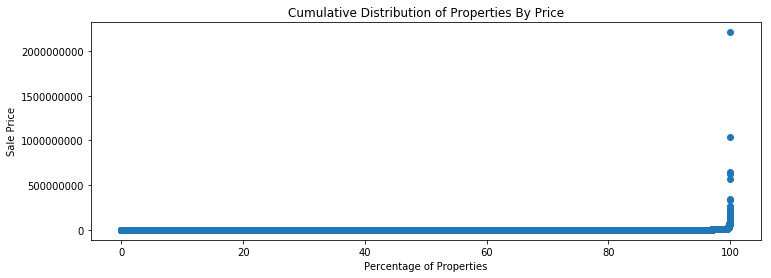

In [36]:
#create a cumulative distribution data column that represents the total percentage of the transactions that are at
#that sale price or greater for forward filled data
df_g = df[['SALE PRICE']].sort_values(by = 'SALE PRICE').reset_index()
df_g['CD'] = 1
df_g['CD'] = df_g['CD'].cumsum()
df_g['CD'] = 100 * df_g['CD'] / len(df_g['CD'])

#plot cdf
plt.figure(figsize=(12,4))
plt.plot(df_g['CD'], df_g['SALE PRICE'], linestyle = 'None', marker = 'o')
plt.title('Cumulative Distribution of Properties By Price')
plt.xlabel('Percentage of Properties')
plt.ylabel('Sale Price')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

This cumulative distribution chart shows that there are a few outliers that highly skew the data. This makes sense as many of the most highly priced properties in the world are in Manhattan. 

In [37]:
#because there are some very high outliers, those will be removed from df_o
df_o = df_o[df_o['SALE PRICE'] < 5000000]

In [38]:
#finding interquartile range of sale price
df_price = df[['SALE PRICE']]

q1p = df_price['SALE PRICE'].quantile(.25)
q3p = df_price['SALE PRICE'].quantile(.75)

iqrp = q3p - q1p

print('The 25% quartile is a price of $' + '{:.2f}'.format(q1p))
print('The 75% quartile is a price of $' + '{:.2f}'.format(q3p))
print('The interquartile range is $' + '{:.2f}'.format(iqrp))

The 25% quartile is a price of $485000.00
The 75% quartile is a price of $1522637.20
The interquartile range is $1037637.20


In [39]:
#lower bound outliers of sale price

spl = df_price < (q1p - 1.5 * iqrp)

splb = spl.loc[spl['SALE PRICE'] == True]
splb

,SALE PRICE


There are no lower bound outliers, as the interquartile range is greater than the 25th percentile price. There would not have been any lower bound outliers as well if prices that were null or less than $1000 were not replaced with the average value.

In [40]:
#upper bound outliers of sale price

spu = df_price > (q3p + 1.5 * iqrp)

spub = spu.loc[spu['SALE PRICE'] == True]
len(spub)

4074

There are 4,074 listed upper bound outliers for sale price. Let's take a deeper look at this data.

In [41]:
#viewing the breakdown by borough of the most expensive properties
upper_outlier_bound = q3p + 1.5 * iqrp
upper_outlier_bound_df = df[df['SALE PRICE'] > upper_outlier_bound]
upper_outlier_bound_df['BOROUGH'].value_counts()

Manhattan        2829
Brooklyn          787
Queens            234
Bronx             194
Staten Island      30
Name: BOROUGH, dtype: int64

The majority of the outliers are in Manhattan. It is not a surprise this borough has the most expensive properties. We can also see the features of these outliers.

In [42]:
#viewing the breakdown by building type of the most expensive properties

upper_outlier_bound_df['BUILDING CLASS CATEGORY'].value_counts()

ELEVATOR APARTMENTS                         2230
WALKUP APARTMENTS                            546
STORE BUILDINGS                              151
ONE FAMILY DWELLINGS                         139
TWO FAMILY DWELLINGS                         133
2-10 UNIT RESIDENTIAL                        125
OFFICE BUILDINGS                             107
COMMERCIAL GARAGES                            69
4-10 UNIT RESIDENTIAL                         67
WAREHOUSES                                    61
FACTORIES                                     51
COMMERCIAL VACANT LAND                        51
THREE FAMILY DWELLINGS                        46
CONDO - OFFICE BUILDINGS                      46
CONDO - STORE BUILDINGS                       40
CONDO - COOPS                                 32
OTHER HOTELS                                  28
HOSPITAL AND HEALTH FACILITIES                19
RELIGIOUS FACILITIES                          17
LOFT BUILDINGS                                17
TAX CLASS 1 - VACANT

Of the most expensive properties, the majority of them are apartment buildings, followed by store buildings then one and two family dwellings.

In [43]:
#creating dataframe without outliers while keeping dataframe with outliers to be used later
print('The new maximum price in the dataframe is now $' + '{:.2f}'.format(upper_outlier_bound))
df_m = df[df['SALE PRICE'] <= upper_outlier_bound]

#percentage of new df
l = len(df_m) / len(df)
print('The length of the new dataframe is ' + str(len(df_m)) + ' data entries. It is comprised of ' + '{:.2f}'.format\
(l * 100) + '% of the latest dataframe.')

The new maximum price in the dataframe is now $3079093.00
The length of the new dataframe is 79709 data entries. It is comprised of 95.14% of the latest dataframe.


There are zero outliers defined by the interquartile range below the lower bound and 4,074 outliers above the upper bound. This is because there are some values that are extremely high and skew the data. After removing the outliers, the dataframe now has a maximum value for price at $3,079,093.00. The updated dataframe has 79,707 data entries, greater than 95% of our original dataframe. 

Since price is the variable we will work on predicting later on, we will keep the dataframe labelled df to be used in the machine learning section later that includes the outliers we have temporarily removed. These extreme values could provide valuable insight to the models on what feature types create the most expensive properties.

# Data Storytelling

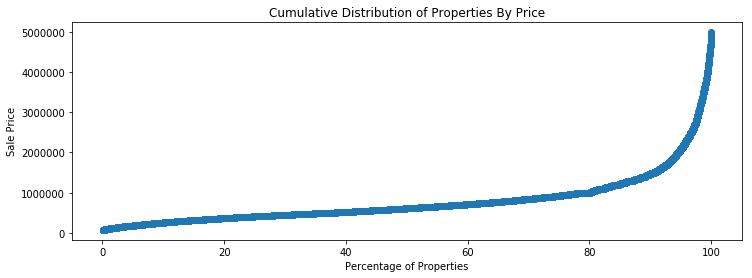

In [44]:
#create a cumulative distribution data column for price using df_o
df_g = df_o[['SALE PRICE']].sort_values(by = 'SALE PRICE').reset_index()
df_g['CD'] = 1
df_g['CD'] = df_g['CD'].cumsum()
df_g['CD'] = 100 * df_g['CD'] / len(df_g['CD'])

#plot cdf
plt.figure(figsize = (12,4))
plt.plot(df_g['CD'], df_g['SALE PRICE'], linestyle = 'None', marker = 'o')
plt.title('Cumulative Distribution of Properties By Price')
plt.xlabel('Percentage of Properties')
plt.ylabel('Sale Price')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

This cumulative distribution graph reflects the percentage share of the properties of the data with a price range from seventy five thousand to five million dollars. There is a perpetual increase from 0% up to approximately 80% to a price of around $1,000,000. At this point, the curve steeply inclines, representing a diminishing amount of properties with continually higher prices.

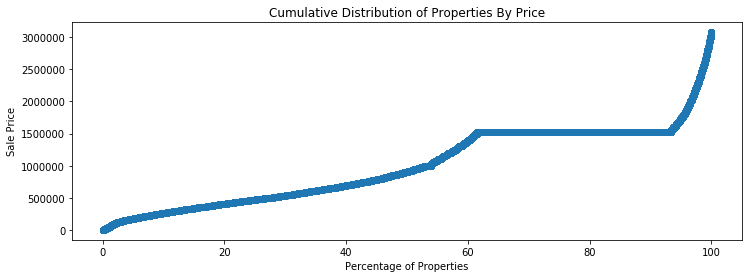

In [45]:
#create a cumulative distribution data column for price using df_m
df_g = df_m[['SALE PRICE']].sort_values(by = 'SALE PRICE').reset_index()
df_g['CD'] = 1
df_g['CD'] = df_g['CD'].cumsum()
df_g['CD'] = 100 * df_g['CD'] / len(df_g['CD'])

#plot cdf
plt.figure(figsize = (12,4))
plt.plot(df_g['CD'], df_g['SALE PRICE'], linestyle = 'None', marker = 'o')
plt.title('Cumulative Distribution of Properties By Price')
plt.xlabel('Percentage of Properties')
plt.ylabel('Sale Price')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

With a more narrow scope for price, we see a more gradual increase in the percentage of properties by price in the cumulative distribution graph. There is a gradual increase in the percentage of properties up to approximately 100,000 dollars, with a steeper increase up to approximately $1,500,000. Then, due to filling the null and smallest values with the average value for price the curve is steady for over 30% of the data. For the remainder of the distribution, the steepest incline exists indicating a diminishing amount of property sales with the highest values in price. This is similar to what we saw in the previous graph, but it is more pronounced now without the extreme outliers in the data present. Let's take a look at this data in a different visual context. 

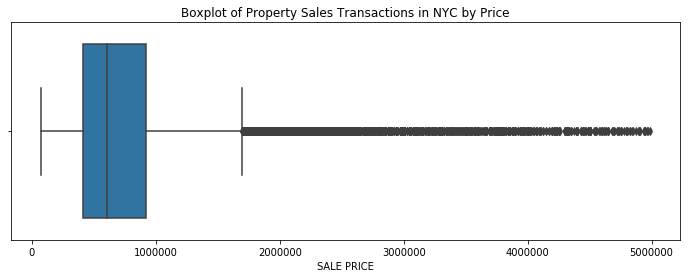

In [46]:
#plot the data and configure the settings
plt.figure(figsize = (12,4))
sns.boxplot(x = 'SALE PRICE', data = df_o)
plt.ticklabel_format(style = 'plain', axis= 'x')
plt.title('Boxplot of Property Sales Transactions in NYC by Price')
plt.show()

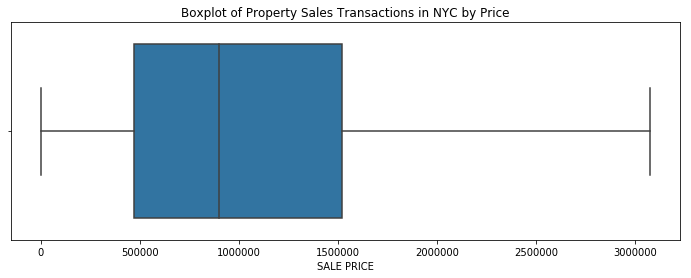

In [47]:
#plot the data and configure the settings
plt.figure(figsize = (12,4))
sns.boxplot(x = 'SALE PRICE', data = df_m)
plt.ticklabel_format(style = 'plain', axis= 'x')
plt.title('Boxplot of Property Sales Transactions in NYC by Price')
plt.show()

Here we can see the data is most concentrated in the price range from five hundred thousand to 1.5 million dollars, extending up to over $3,000,000. The upper echelon of properties in this data have a price range of 2 to 3 million dollars. The next analysis will take a look at what are the most common attributes of the most expensive properties. 


In [48]:
#dataframe of prices greater than 2 million
df_2m = df_m[df_m['SALE PRICE'] >= 2000000]

#find breakdown of properties by borough with price greater than 2 million
df_2m = pd.DataFrame(df_2m['BOROUGH'].value_counts())
df_2m['Percentage'] = (df_2m['BOROUGH'] / df_2m['BOROUGH'].sum()) * 100
df_2m.reset_index(level = 0, inplace = True)
df_2m = df_2m.rename(columns = {'index':'Borough', 'BOROUGH':'total'})

#breakdown of properties by borough of all data points
df_all = pd.DataFrame(df_m['BOROUGH'].value_counts())
df_all['Percentage'] = df_all['BOROUGH'] / df_all['BOROUGH'].sum() * 100
df_all.reset_index(level = 0, inplace = True)
df_all = df_all.rename(columns = {'index':'Borough', 'BOROUGH':'total'})

[Text(0.5,1,'% Breakdown of Boroughs of All Properties')]

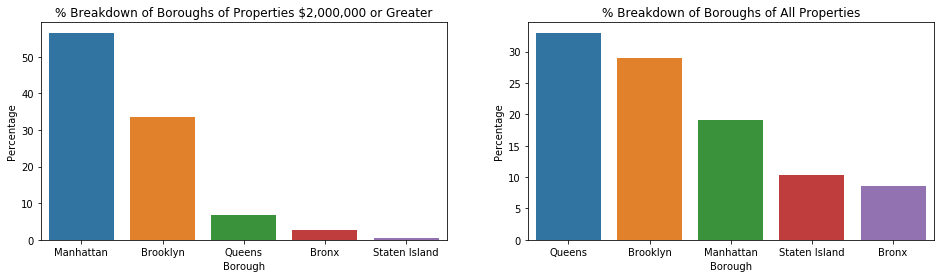

In [49]:
#creating graphs comparing percentages of properties over 2 mil by borough to percentages of boroughs all values
fig = plt.figure(figsize = (16, 4))
axes = fig.add_subplot(1, 2, 1)
sns.barplot(data = df_2m, x = 'Borough', y = 'Percentage', ax = axes)
axes.set(title = '% Breakdown of Boroughs of Properties $2,000,000 or Greater')
axes = fig.add_subplot(1, 2, 2)
sns.barplot(data = df_all, x = 'Borough', y = 'Percentage', ax = axes)
axes.set(title = '% Breakdown of Boroughs of All Properties')

The graph on the left shows the percentage of properties by borough of transactions over 2 million dollars. Manhattan has more than half of them and next highest share is Brooklyn with just over 30%. Staten Island has the least amount despite being ahead of the Bronx in having more total transactions. Even though Queens has the highest percentage of properties overall, they have less than 10% of the properties sold at over 2 million dollars. It is important to note that these visuals do not include the upper bound outliers we removed. Using those data points, these graphs would look like this:

[Text(0.5,1,'% Breakdown of Boroughs of All Properties')]

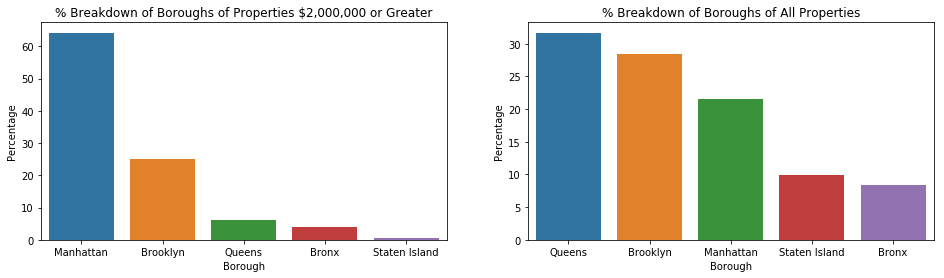

In [50]:
#computing the same graphs using the upper bound outliers (the most expensive data points)
#dataframe of prices greater than 2 million
df_2m = df[df['SALE PRICE'] >= 2000000]

#find breakdown of properties by borough with price greater than 2 million
df_2m = pd.DataFrame(df_2m['BOROUGH'].value_counts())
df_2m['Percentage'] = (df_2m['BOROUGH'] / df_2m['BOROUGH'].sum()) * 100
df_2m.reset_index(level = 0, inplace = True)
df_2m = df_2m.rename(columns = {'index':'Borough', 'BOROUGH':'total'})

#breakdown of properties by borough of all data points
df_all = pd.DataFrame(df['BOROUGH'].value_counts())
df_all['Percentage'] = df_all['BOROUGH'] / df_all['BOROUGH'].sum() * 100
df_all.reset_index(level = 0, inplace = True)
df_all = df_all.rename(columns = {'index':'Borough', 'BOROUGH':'total'})

#pltoting the figures
fig = plt.figure(figsize = (16, 4))
axes = fig.add_subplot(1, 2, 1)
sns.barplot(data = df_2m, x = 'Borough', y = 'Percentage', ax = axes)
axes.set(title = '% Breakdown of Boroughs of Properties $2,000,000 or Greater')
axes = fig.add_subplot(1, 2, 2)
sns.barplot(data = df_all, x = 'Borough', y = 'Percentage', ax = axes)
axes.set(title = '% Breakdown of Boroughs of All Properties')

These two graphs comparisons are very similar to what we have just observed, with a noticeable difference in the increase in percentage share of Manhattan in having the most expensive properties. This is consistent with what we concluded earlier where the majority of the upper bound outliers removed were from Manhattan. It is clear there are more very high prices in Manhattan than the other four boroughs combined. Next we will look at the most common building categories of the most expensive properties.

[Text(0.5,1,'Total of Most Common Building Class of All Properties')]

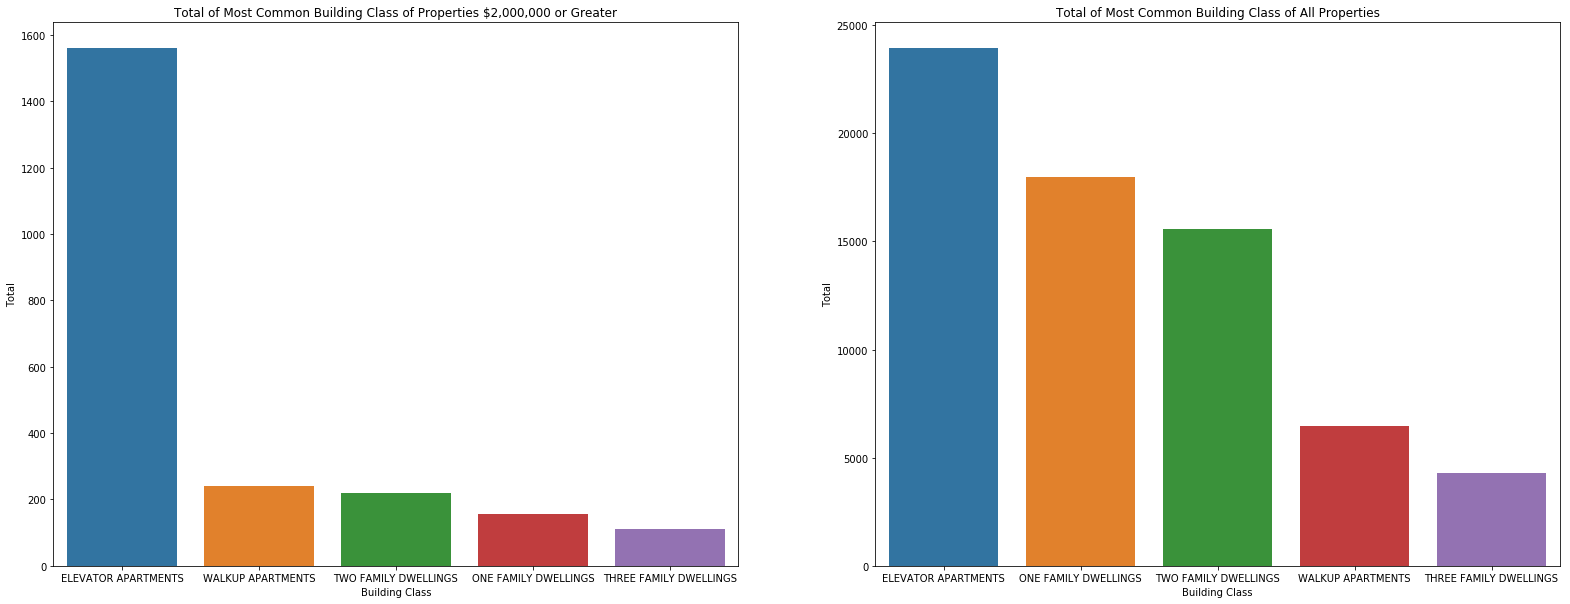

In [51]:
#dataframe of prices greater than 2 million
df_2m = df_m[df_m['SALE PRICE'] >= 2000000]

#find breakdown of properties by most common building class with price greater than 2 million
df_bc = pd.DataFrame(df_2m['BUILDING CLASS CATEGORY'].value_counts().head())
df_bc.reset_index(level = 0, inplace = True)
df_bc = df_bc.rename(columns = {'index':'Building Class','BUILDING CLASS CATEGORY':'Total'})

#find breakdown of properties by most common building class of all properties
df_bcc = pd.DataFrame(df_m['BUILDING CLASS CATEGORY'].value_counts().head())
df_bcc.reset_index(level = 0, inplace = True)
df_bcc = df_bcc.rename(columns = {'index':'Building Class','BUILDING CLASS CATEGORY':'Total'})

#plotting the figures
fig = plt.figure(figsize=(27, 10))
axes = fig.add_subplot(1, 2, 1)
sns.barplot(data = df_bc, x = 'Building Class', y = 'Total', ax = axes)
axes.set(title = 'Total of Most Common Building Class of Properties $2,000,000 or Greater')
axes = fig.add_subplot(1, 2, 2)
sns.barplot(data = df_bcc, x = 'Building Class', y = 'Total', ax = axes)
axes.set(title = 'Total of Most Common Building Class of All Properties')

Of the most expensive properties, the majority of them are overwhelmingly elevator apartments, which is the most frequent building class of all the properties. It is interesting that the most common properties also make up the most frequent of the most expensive properties as well.

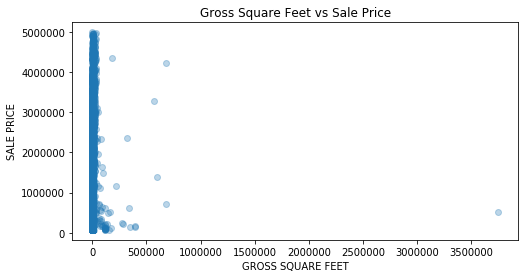

In [52]:
#plotting gross square footage and price
plt.figure(figsize=(8,4))
sns.regplot(x = 'GROSS SQUARE FEET', y = 'SALE PRICE', data = df_o, fit_reg = False, scatter_kws = {'alpha':0.3})
plt.title('Gross Square Feet vs Sale Price')
plt.show()

There are a few outliers skewing the data. Let's see what this graphic looks like with these values removed.

In [53]:
#create dataframes with the removal of the properties with the largest square footage values
df_gsf = df_o[df_o['GROSS SQUARE FEET'] < 20000]

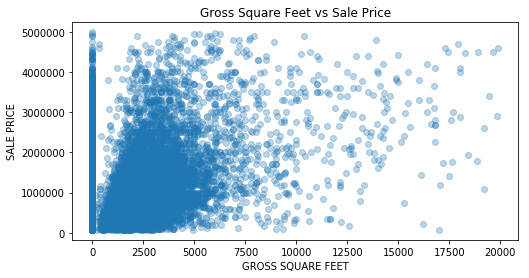

In [54]:
#plotting gross square footage and price
plt.figure(figsize=(8,4))
sns.regplot(x = 'GROSS SQUARE FEET', y = 'SALE PRICE', data = df_gsf, fit_reg = False, scatter_kws = {'alpha':0.3})
plt.title('Gross Square Feet vs Sale Price')
plt.show()

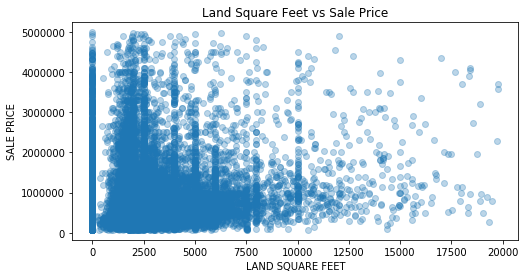

In [55]:
#plotting land square footage and price
df_lsf = df_o[df_o['LAND SQUARE FEET'] < 20000]

plt.figure(figsize=(8,4))
sns.regplot(x = 'LAND SQUARE FEET', y = 'SALE PRICE', data = df_lsf, fit_reg = False, scatter_kws = {'alpha':0.3})
plt.title('Land Square Feet vs Sale Price')
plt.show()

These graphs show the relationship between gross square footage and land square footage with price for properties in New York City. There does not appear to be a significant relationship for land square feet, which represents the total land area of the property. There are many data points that have larger amounts of land square footage but are still on the bottom of the spectrum in terms of price. This graph is much more dispersed. Gross square footage is much more positively associated with price than land square feet. As the gross square footage values increase, there become more data points toward the top of the graph. Gross square feet here is referring to the total land area of all floors of a building. This can tell us that while gross square feet could be indicative of price there are many variables to consider when pricing a property, such as its location and other features besides its size.

In [56]:
#create dataframes with the removal of the properties with the largest square footage values, forward filled df_m
df_gsf = df_m[df_m['GROSS SQUARE FEET'] < 20000]

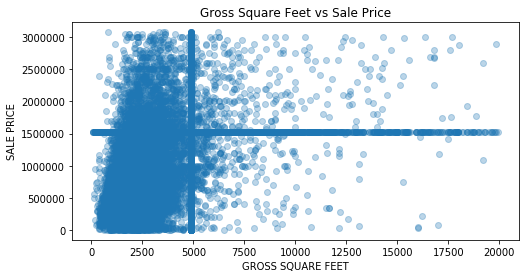

In [57]:
#plotting gross square footage and price
plt.figure(figsize=(8,4))
sns.regplot(x = 'GROSS SQUARE FEET', y = 'SALE PRICE', data = df_gsf, fit_reg = False, scatter_kws = {'alpha':0.3})
plt.title('Gross Square Feet vs Sale Price')
plt.show()

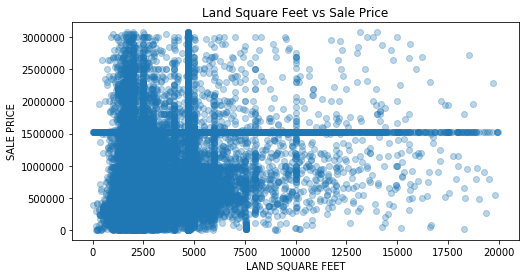

In [58]:
#plotting land square footage and price
df_lsf = df_m[df_m['LAND SQUARE FEET'] < 20000]

plt.figure(figsize=(8,4))
sns.regplot(x = 'LAND SQUARE FEET', y = 'SALE PRICE', data = df_lsf, fit_reg = False, scatter_kws = {'alpha':0.3})
plt.title('Land Square Feet vs Sale Price')
plt.show()

These graphs show the relationship between gross square footage and land square footage with price for properties in New York City. There does not appear to be a significant relationship for land square feet. There are many data points that have larger amounts of land square footage but are still on the bottom of the spectrum in terms of price. This graph is much more dispersed as well. Gross square footage is much more positively associated with price than land square feet. There are many fewer of the greater square footage data points below the average than there are above the average. Next will be observing how units affect price.

In [59]:
#checking if there are values where the units do not equal. Total units should equal commercial plus residential units
len(df_o[df_o['TOTAL UNITS'] != df_o['COMMERCIAL UNITS'] + df_o['RESIDENTIAL UNITS']])

147

There are 147 data entries where the commercial and residential units values do not sum to the total units. We can exclude these values when performing analysis on price based on the amount of units, but we will still include these values in our models for price later on.

In [60]:
#creating dataframe of values where units match up correctly
df_units = df_o[df_o['TOTAL UNITS'] == df_o['COMMERCIAL UNITS'] + df_o['RESIDENTIAL UNITS']]

In [61]:
#only including data values of less than 10 units in the dataframe
df_units = df_units[df_units['TOTAL UNITS'] < 10]

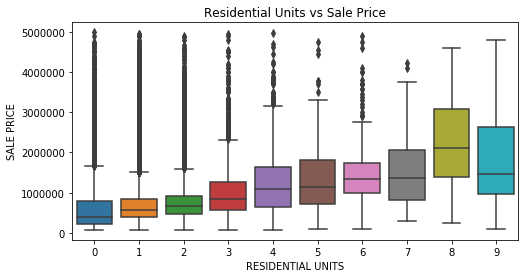

In [62]:
#creating a box plot of relationship between total units and price
plt.figure(figsize = (8,4))
sns.boxplot(x = 'RESIDENTIAL UNITS', y = 'SALE PRICE', data = df_units)
plt.title('Residential Units vs Sale Price')
plt.show()

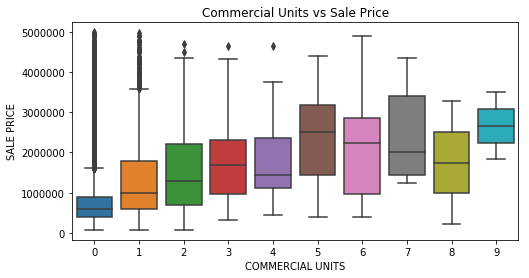

In [63]:
#creating a box plot of relationship between total units and price
plt.figure(figsize = (8,4))
sns.boxplot(x = 'COMMERCIAL UNITS', y = 'SALE PRICE', data = df_units)
plt.title('Commercial Units vs Sale Price')
plt.show()

These boxplots reflect a trend of the median price and range of prices mainly increasing as the amount of residential and commercial units increase for a property. This makes sense logistically because when more space is added the price increases. The only mark where the median price of residential units decreases is at 9, however the 75th percentile price is the highest of all. For commercial units, there are slight dips at 4, 7, and 8 units but the median price for 9 commercial units is the highest for all properties with less than 10 units. 

In [64]:
#checking if there are values where the units do not equal. Total units should equal commercial plus residential units
len(df_m[df_m['TOTAL UNITS'] != df_m['COMMERCIAL UNITS'] + df_m['RESIDENTIAL UNITS']])

2485

In [65]:
#creating dataframe of values where units match up correctly
df_units = df_m[df_m['TOTAL UNITS'] == df_m['COMMERCIAL UNITS'] + df_m['RESIDENTIAL UNITS']]

In [66]:
#removing data with 0 and high outlier values
#df_units = df_units[(df_units['TOTAL UNITS'] > 0) & (df_units['TOTAL UNITS'] < 50)]

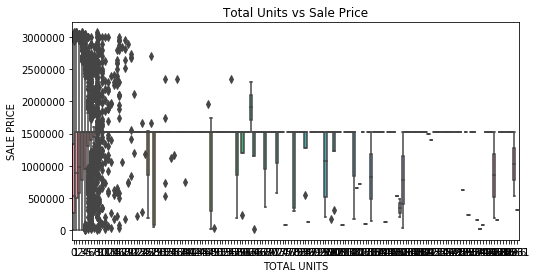

In [67]:
#creating a box plot of relationship between total units and price
plt.figure(figsize = (8,4))
sns.boxplot(x = 'TOTAL UNITS', y = 'SALE PRICE', data = df_units)
plt.title('Total Units vs Sale Price')
plt.show()

This graph does not tell us much, we can exclude the upper value for units. The majority of the data is comprised of properties with less than ten units.

In [68]:
#only including data values of less than 10 units in the dataframe
df_units = df_units[df_units['TOTAL UNITS'] < 10]

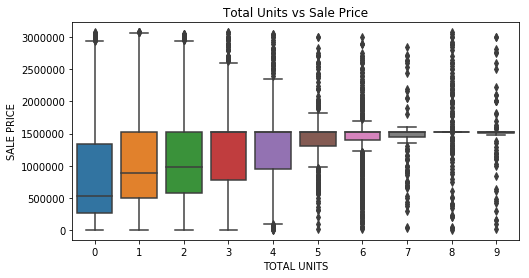

In [69]:
#creating a box plot of relationship between total units and price
plt.figure(figsize = (8,4))
sns.boxplot(x = 'TOTAL UNITS', y = 'SALE PRICE', data = df_units)
plt.title('Total Units vs Sale Price')
plt.show()

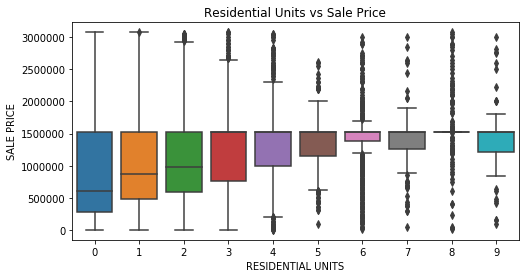

In [70]:
#creating a box plot of relationship between total units and price
plt.figure(figsize = (8,4))
sns.boxplot(x = 'RESIDENTIAL UNITS', y = 'SALE PRICE', data = df_units)
plt.title('Residential Units vs Sale Price')
plt.show()

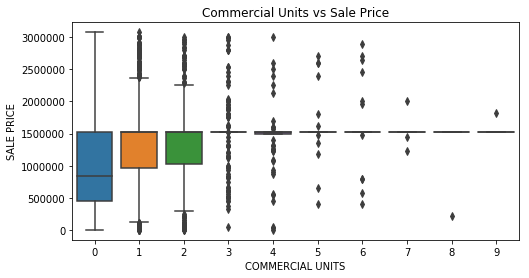

In [71]:
#creating a box plot of relationship between total units and price
plt.figure(figsize = (8,4))
sns.boxplot(x = 'COMMERCIAL UNITS', y = 'SALE PRICE', data = df_units)
plt.title('Commercial Units vs Sale Price')
plt.show()

These boxplots show a general trend of the median price increasing as the amount of units increase when the value for total units is low. As the values increase the median price levels off. This makes sense logistically because when more space is added the price increases, but there becomes a point where the addition of more units does not influence price as significantly. Next we can observe how the age of a building impacts price.

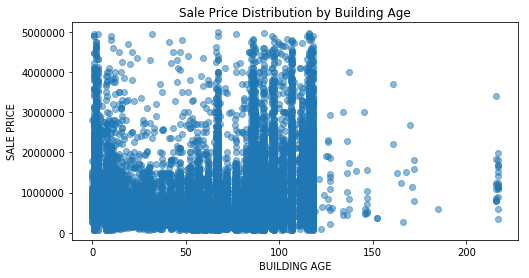

In [72]:
plt.figure(figsize = (8,4))
sns.regplot(x = 'BUILDING AGE', y = 'SALE PRICE', data = df_o, fit_reg = False, scatter_kws = {'alpha':0.5})
plt.title('Sale Price Distribution by Building Age')
plt.show()

The age of the building also does not appear to tell us much in terms of its price. Most of the building ages are around 120 years old or less and are priced consistently. The oldest buildings, aged around 125 years or more, are easier to view on the graph because there are considerably less of them. Some of these are some of the lowest priced while others are among the highest, but they are represented in all areas of the price scale. 

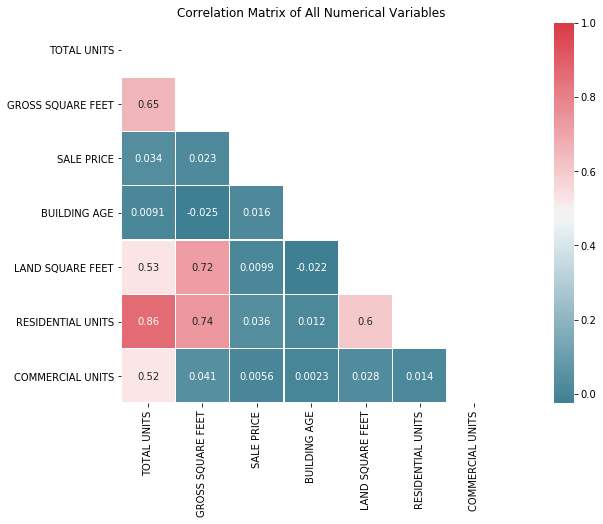

In [73]:
#configuring a correlation matrix

#compute the correlation matrix
#choose numerical values to include
d = df_m[['TOTAL UNITS','GROSS SQUARE FEET','SALE PRICE', 'BUILDING AGE', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS', 
'COMMERCIAL UNITS']]
corr = d.corr()

#generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

#set up figure
f, ax = plt.subplots(figsize = (19, 7))

#generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

#draw heatmap with mask and the correct aspect ratio
sns.heatmap(corr, mask = mask, square = True, linewidths = .5, annot = True, cmap = cmap)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix of All Numerical Variables')
plt.show()

Here we can see the correlations between all of the numerical values in the dataset. The relationships with the highest correlations are residential units with total units and gross square feet with residential units, which make sense intuitively. The relationships most significant for our analysis are associated with price. Total units and gross square footage have the highest correlations with price, which is largely what we saw based off of the previous visualizations. One variable not being evaluated here is the date. Next we will see how price changes by time of the year the property is sold.

### Working with the categorical data

In [74]:
#viewing average sale price by month
monthly_price = df_o.pivot_table(index = 'Month', values = 'SALE PRICE', aggfunc = np.mean).\
sort_values(by = 'SALE PRICE', ascending = False)

monthly_price

,SALE PRICE
Month,
AUG,840575
JUN,823305
JUL,810676
FEB,810205
JAN,805676
MAY,797516
APR,782730
MAR,773295
DEC,770227


Text(0.5,1,'Monthly Average Sale Price')

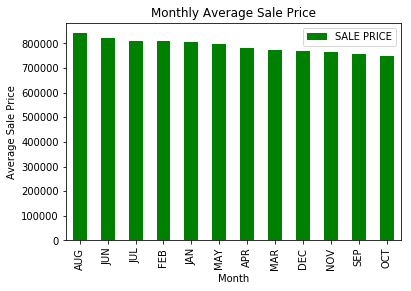

In [75]:
#creating bar graph by month
monthly_price.plot(kind = 'bar', color = 'green')
plt.ylabel('Average Sale Price')
plt.title('Monthly Average Sale Price')

Based on the graph above, the month of August has the largest average sale price with June and July following. These months having the greatest values for average price could be related to the increased demand for new properties during the summer compared to winter or other colder months in New York. If one is looking for the most economical property transaction it could be smart to complete it in the fall, which had the lowest average monthly prices of November, September and October.

In [76]:
#viewing average sale price by month
monthly_price = df_m.pivot_table(index = 'Month', values = 'SALE PRICE', aggfunc = np.mean).\
sort_values(by = 'SALE PRICE', ascending = False)

monthly_price

,SALE PRICE
Month,
MAY,1015821
JUN,1007385
JAN,1001795
OCT,998783
DEC,996730
MAR,993144
NOV,992892
JUL,992260
FEB,991945


Text(0.5,1,'Monthly Average Sale Price')

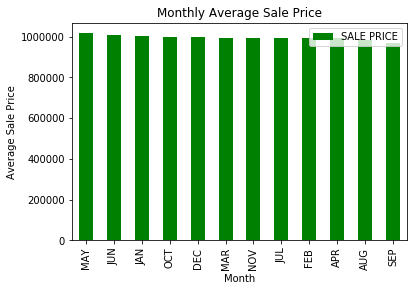

In [77]:
#creating bar graph by month
monthly_price.plot(kind = 'bar', color = 'green')
plt.ylabel('Average Sale Price')
plt.title('Monthly Average Sale Price')

Based on the graph and the table, the month of May has the largest average sale price with June and January just behind it. May and June having the greatest values for average price could be related to more demand for new properties just before the summer compared to winter or other colder months in New York. If one is looking for the most economical property transaction it could be wise to complete it in the fall, just after summer is over, which had the lowest average monthly prices of August and September. A more in depth look at this will evaluate average monthly price by the property's borough.

In [78]:
#viewing average sale price per borough by month
monthly_borough_price = df_o.pivot_table(index = ['Month','BOROUGH'], values = 'SALE PRICE', aggfunc = np.mean).\
sort_values(by = ['BOROUGH','Month'])

monthly_borough_price

,,SALE PRICE
Month,BOROUGH,
APR,Bronx,551708
AUG,Bronx,528019
DEC,Bronx,509132
FEB,Bronx,522200
JAN,Bronx,519361
JUL,Bronx,535701
JUN,Bronx,511289
MAR,Bronx,460036
MAY,Bronx,506693


In [79]:
#configuring dataframes to plot consistently monthly values on plot
bronx = monthly_borough_price[:12].sort_values(by = 'Month')
brooklyn = monthly_borough_price[12:24].sort_values(by = 'Month')
manhattan = monthly_borough_price[24:36].sort_values(by = 'Month')
queens = monthly_borough_price[36:48].sort_values(by = 'Month')
staten = monthly_borough_price[48:60].sort_values(by = 'Month')

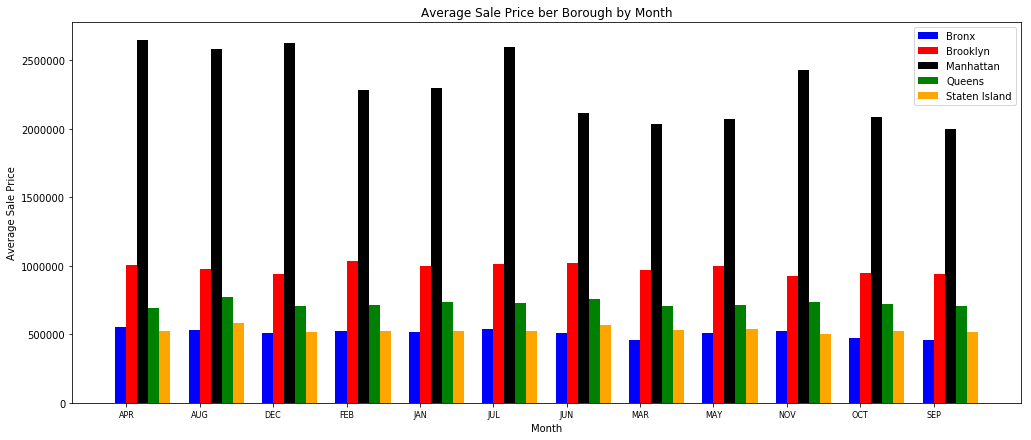

In [80]:
#plotting average sale price by borough per month
N = 12
ind = np.arange(N) 
width = 0.15
fig = plt.figure(figsize = (17, 7))
axes = fig.add_subplot(1, 1, 1)
plt.bar(ind, bronx['SALE PRICE'], width, label = 'Bronx', color = 'blue')
plt.bar(ind + width, brooklyn['SALE PRICE'], width, label = 'Brooklyn', color = 'red')
plt.bar(ind + width * 2, manhattan['SALE PRICE'], width, label = 'Manhattan', color = 'black')
plt.bar(ind + width * 3, queens['SALE PRICE'], width, label = 'Queens', color = 'green')
plt.bar(ind + width * 4, staten['SALE PRICE'], width, label = 'Staten Island', color = 'orange')

plt.xlabel('Month')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price ber Borough by Month')
plt.xticks(ind + width / 2, ('APR', 'AUG', 'DEC','FEB','JAN','JUL','JUN','MAR','MAY','NOV','OCT','SEP'), size=8)
plt.legend(loc=1)

plt.show()

This graph represents each borough's average sale price by month, listed alphabetically. From this we are able to notice the differences in price by borough comparing month to month. In Manhattan, these differences are most dramatic due to some higher property values, however most months by borough appear mainly consistent. August, the highest priced month overall, has the highest average by month for Queens and Staten Island. Similarly, here is a breakdown of price by the season in which a property is sold.

In [81]:
#viewing average sale price per borough by month
monthly_borough_price = df_m.pivot_table(index = ['Month','BOROUGH'], values = 'SALE PRICE', aggfunc = np.mean).\
sort_values(by = ['BOROUGH','Month'])

monthly_borough_price

,,SALE PRICE
Month,BOROUGH,
APR,Bronx,784002
AUG,Bronx,728034
DEC,Bronx,783307
FEB,Bronx,777466
JAN,Bronx,798053
JUL,Bronx,735433
JUN,Bronx,779117
MAR,Bronx,695658
MAY,Bronx,793546


In [82]:
#configuring dataframes to plot consistently monthly values on plot
bronx = monthly_borough_price[:12].sort_values(by = 'Month')
brooklyn = monthly_borough_price[12:24].sort_values(by = 'Month')
manhattan = monthly_borough_price[24:36].sort_values(by = 'Month')
queens = monthly_borough_price[36:48].sort_values(by = 'Month')
staten = monthly_borough_price[48:60].sort_values(by = 'Month')

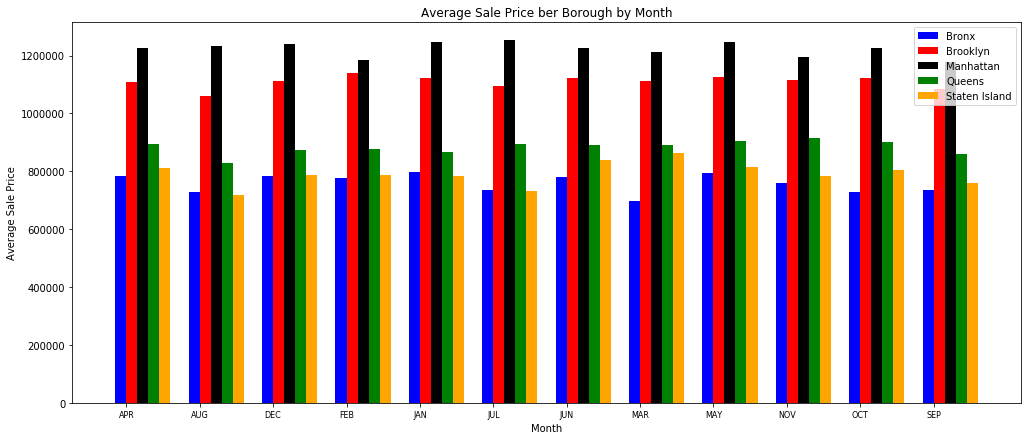

In [83]:
#plotting average sale price by borough per month
N = 12
ind = np.arange(N) 
width = 0.15
fig = plt.figure(figsize = (17, 7))
axes = fig.add_subplot(1, 1, 1)
plt.bar(ind, bronx['SALE PRICE'], width, label = 'Bronx', color = 'blue')
plt.bar(ind + width, brooklyn['SALE PRICE'], width, label = 'Brooklyn', color = 'red')
plt.bar(ind + width * 2, manhattan['SALE PRICE'], width, label = 'Manhattan', color = 'black')
plt.bar(ind + width * 3, queens['SALE PRICE'], width, label = 'Queens', color = 'green')
plt.bar(ind + width * 4, staten['SALE PRICE'], width, label = 'Staten Island', color = 'orange')

plt.xlabel('Month')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price ber Borough by Month')
plt.xticks(ind + width / 2, ('APR', 'AUG', 'DEC','FEB','JAN','JUL','JUN','MAR','MAY','NOV','OCT','SEP'), size=8)
plt.legend(loc=1)

plt.show()

This graph represents each borough's average sale price by month, listed alphabetically. From this we are able to notice the differences in price by borough comparing month to month. In Manhattan, these differences are most dramatic due to some higher property values, however the values appear mainly consistent. Let's see if the monthly data is consistent with the results by season.

In [84]:
#viewing average sale price by season
seasonal_price = df_o.pivot_table(index = 'Season', values = 'SALE PRICE', aggfunc = np.mean).\
sort_values(by = 'SALE PRICE', ascending = False)

seasonal_price

,SALE PRICE
Season,
Summer,824075
Winter,793768
Spring,784370
Fall,757084


In [85]:
824075 - 757084

66991

Text(0.5,1,'Seasonal Average Sale Price')

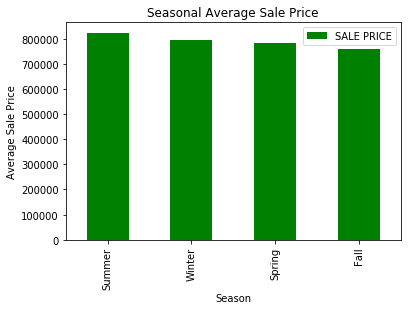

In [86]:
#creating bar graph by month
seasonal_price.plot(kind = 'bar', color = 'green')
plt.ylabel('Average Sale Price')
plt.title('Seasonal Average Sale Price')

Based on the chart, these values are consistent with the monthly data where summer has the highest average price and fall has the lowest. There is a difference of $66,991 between these two seasons. Varying from the date, another categorical variable from the dataset is a property's tax class.

In [87]:
#viewing average sale price by season
seasonal_price = df_m.pivot_table(index = 'Season', values = 'SALE PRICE', aggfunc = np.mean).\
sort_values(by = 'SALE PRICE', ascending = False)

seasonal_price

,SALE PRICE
Season,
Spring,1000489
Winter,996935
Summer,996248
Fall,985370


Text(0.5,1,'Seasonal Average Sale Price')

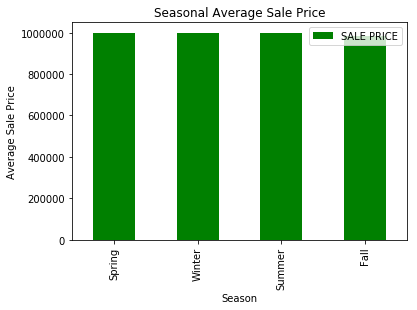

In [88]:
#creating bar graph by month
seasonal_price.plot(kind = 'bar', color = 'green')
plt.ylabel('Average Sale Price')
plt.title('Seasonal Average Sale Price')

Based on the chart and table these values are consistent with the monthly data where spring has the highest average price and fall has the lowest. There is a greater than $15,000 difference between these two seasons. Varying from the date, another categorical variable from the dataset is a property's tax class.

In [89]:
#viewing the different tax classes
df_o['TAX CLASS AT PRESENT'].unique().tolist()

['2B', '2A', '4', '2', '1', '2C', '1A', '1B', ' ', '1C']

In [90]:
#creating dataframe without missing value for tax class
df_tc = df_o[df_o['TAX CLASS AT PRESENT'] != ' ']

In [91]:
#comparing price with the various tax classes at present
tax_class = df_tc.pivot_table(index = 'TAX CLASS AT PRESENT', values = 'SALE PRICE', aggfunc = np.median).\
sort_values(by = 'SALE PRICE', ascending = False)

tax_class

,SALE PRICE
TAX CLASS AT PRESENT,
2B,1850000
2A,1200000
4,1000000
1C,949334
2C,834000
1,595000
2,505493
1A,499000
1B,400000


Text(0.5,1,'Tax Class at Present by Median Sale Price')

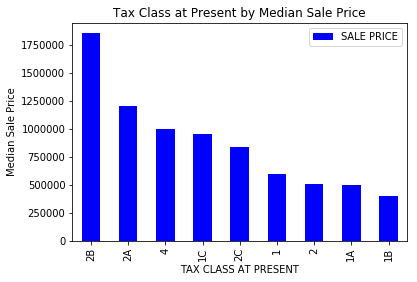

In [92]:
#creating bar graph by tax class
tax_class.plot(kind = 'bar', color = 'blue')
plt.ylabel('Median Sale Price')
plt.title('Tax Class at Present by Median Sale Price')

Every property in New York City is assigned to a tax class of 1, 2, 3, or 4 based on the use of the property. Class 1 includes most residential properties of up to 3 units. Class 2 includes all other properties that are mainly residential including cooperatives and condominiums. Class 3 includes property with equipment owned by a gas, electrical, or telephone company. Class 4 includes all other types of properties such as warehouses, offices, and factories. The most expensive property sales transactions come from tax class 2. These are comprised of the sales of mainly apartment building complexes. Class 1 has the lowest median prices of the tax groups. 

In [93]:
#viewing the different tax classes
df_m['TAX CLASS AT PRESENT'].unique().tolist()

['2', '2C', '2A', '4', ' ', '1', '1C', '2B', '3', '1A', '1B']

In [94]:
#creating dataframe without missing value for tax class
df_tc = df_m[df_m['TAX CLASS AT PRESENT'] != ' ']

In [95]:
#comparing price with the various tax classes at present
tax_class = df_tc.pivot_table(index = 'TAX CLASS AT PRESENT', values = 'SALE PRICE', aggfunc = np.median).\
sort_values(by = 'SALE PRICE', ascending = False)

tax_class

,SALE PRICE
TAX CLASS AT PRESENT,
2A,1522637
4,1522637
2B,1522637
3,1522637
1B,1522637
1C,1475000
2C,975000
1,870000
2,750000


Text(0.5,1,'Tax Class at Present by Median Sale Price')

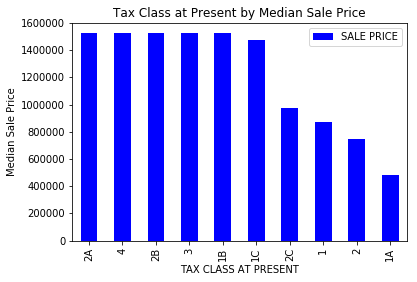

In [96]:
#creating bar graph by tax class
tax_class.plot(kind = 'bar', color = 'blue')
plt.ylabel('Median Sale Price')
plt.title('Tax Class at Present by Median Sale Price')

In [97]:
#viewing the different tax classes at the time of sale
df_m['TAX CLASS AT TIME OF SALE'].unique()

[2, 4, 1, 3]
Categories (4, int64): [2, 4, 1, 3]

In [98]:
#comparing price with the various tax classes at time of sale
tax_class = df_m.pivot_table(index = 'TAX CLASS AT TIME OF SALE', values = 'SALE PRICE', aggfunc=np.median\
).sort_values(by = 'SALE PRICE', ascending = False)

tax_class

,SALE PRICE
TAX CLASS AT TIME OF SALE,
4,1522637
3,1522637
1,865756
2,838019


Text(0.5,1,'Tax Class at Time of Sale by Median Sale Price')

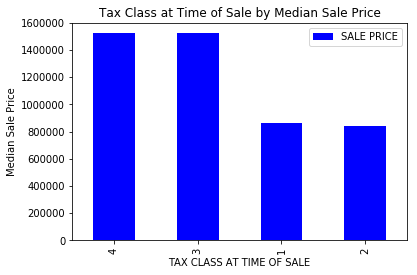

In [99]:
#creating bar graph by tax class at time of sale
tax_class.plot(kind = 'bar', color = 'blue')
plt.ylabel('Median Sale Price')
plt.title('Tax Class at Time of Sale by Median Sale Price')

At the time of sale, the values of properties in tax class 4 are the most expensive, followed by tax class 3, 2, then 1. This is not completely consistent to what we viewed in the last graph representing price of the current tax class. Here, class 2 has the lowest median prices while class 4 has become the highest priced.

Next we can look at which building classes are most expensive compared to the total counts of the most frequent building classes.

Text(0.5,1,'Average Price of Most Expensive Building Types')

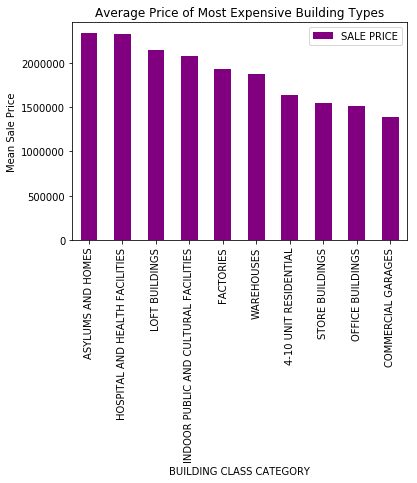

In [100]:
#find breakdown of properties by most expensive building class 
building_class_c = df_o.pivot_table(index = 'BUILDING CLASS CATEGORY', values = 'SALE PRICE', aggfunc = np.mean).\
sort_values(by = 'SALE PRICE', ascending = False).head(10)

#creating bar graph by building class
building_class_c.plot(kind = 'bar', color = 'purple')
plt.ylabel('Mean Sale Price')
plt.title('Average Price of Most Expensive Building Types')

Text(0.5,1,'Most Frequent Building Types')

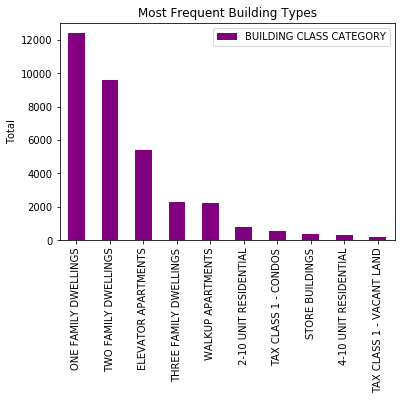

In [101]:
#find breakdown of properties by most common building class of all properties
df_bcc = pd.DataFrame(df_o['BUILDING CLASS CATEGORY'].value_counts().head(10))
#creating bar graph by building class totals
df_bcc.plot(kind = 'bar', color = 'purple')
plt.ylabel('Total')
plt.title('Most Frequent Building Types')

The most frequent property types sold in New York City were homes and apartment buildings. This differs from the most expensive property types, where facilities such as asylums and hospitals were the most expensive on average.

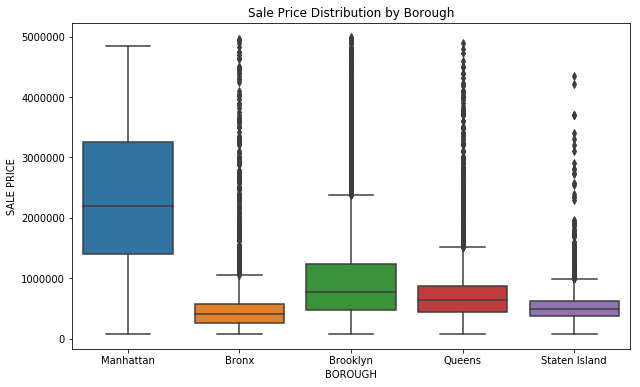

In [102]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'BOROUGH', y = 'SALE PRICE', data = df_o)
plt.title('Sale Price Distribution by Borough')
plt.show()

This is consistent with our the earlier results, where Manhattan has the most expensive properties by a significant margin. Its 25th percentile for price is greater than the 75th percentile price of all other boroughs. Staten Island and the Bronx have been very similar with one another in terms of prices throughout and again are the lowest priced as represented by this graph. We can go deeper down into location data by viewing which neighborhoods in each borough sold for the highest average price.

In [103]:
#top 10 highest average priced neighborhoods in Manhattan
manhattan = df_o[df_o['BOROUGH'] == 'Manhattan']
manhattan_neighborhoods = manhattan.pivot_table(index = 'NEIGHBORHOOD', values = 'SALE PRICE', aggfunc = np.mean\
).sort_values(by = 'SALE PRICE', ascending = False)[:10]
manhattan_neighborhoods

,SALE PRICE
NEIGHBORHOOD,
JAVITS CENTER,4840000
KIPS BAY,4250000
UPPER WEST SIDE (96-116),3993750
LOWER EAST SIDE,3933333
CLINTON,3900000
EAST VILLAGE,3850000
GREENWICH VILLAGE-CENTRAL,3781000
ALPHABET CITY,3775822
GRAMERCY,3700000


Text(0.5,1,'Top 10 Manhattan Neighborhoods by Mean Sale Price')

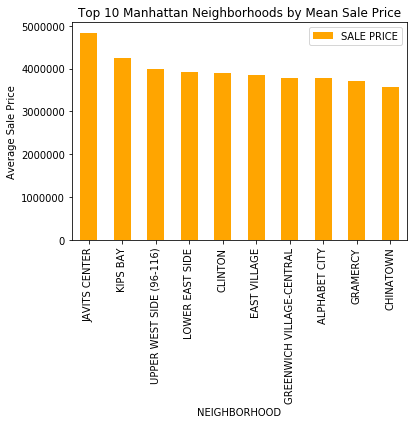

In [104]:
#plotting bar graph of Manhattan neighborhoods average price
manhattan_neighborhoods.plot(kind = 'bar', color = 'orange')
plt.ylabel('Average Sale Price')
plt.title('Top 10 Manhattan Neighborhoods by Mean Sale Price')

In [105]:
#top 10 highest average priced neighborhoods in Brooklyn
brooklyn = df_o[df_o['BOROUGH'] == 'Brooklyn']
brooklyn_neighborhoods = brooklyn.pivot_table(index = 'NEIGHBORHOOD', values = 'SALE PRICE', aggfunc = np.mean\
).sort_values(by = 'SALE PRICE', ascending = False)[:10]
brooklyn_neighborhoods

,SALE PRICE
NEIGHBORHOOD,
CARROLL GARDENS,1967992
GOWANUS,1800719
DOWNTOWN-FULTON FERRY,1770035
BOERUM HILL,1766671
BROOKLYN HEIGHTS,1752847
DOWNTOWN-FULTON MALL,1609928
RED HOOK,1569153
PARK SLOPE,1562092
PARK SLOPE SOUTH,1456190


Text(0.5,1,'Top 10 Brooklyn Neighborhoods by Mean Sale Price')

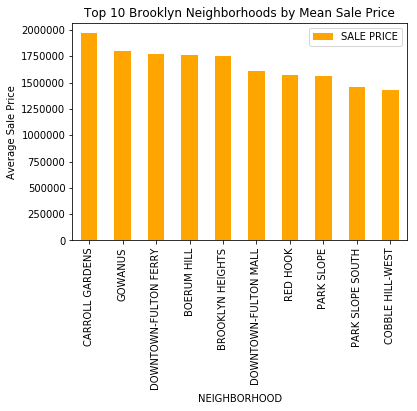

In [106]:
#plotting bar graph of Brooklyn neighborhoods average price
brooklyn_neighborhoods.plot(kind = 'bar', color = 'orange')
plt.ylabel('Average Sale Price')
plt.title('Top 10 Brooklyn Neighborhoods by Mean Sale Price')

In [107]:
#top 10 highest average priced neighborhoods in Queens
queens = df_o[df_o['BOROUGH'] == 'Queens']
queens_neighborhoods = queens.pivot_table(index = 'NEIGHBORHOOD', values = 'SALE PRICE', aggfunc = np.mean\
).sort_values(by = 'SALE PRICE', ascending = False)[:10]
queens_neighborhoods

,SALE PRICE
NEIGHBORHOOD,
LONG ISLAND CITY,1721839
ASTORIA,1294689
SUNNYSIDE,1215738
FOREST HILLS,1199638
JAMAICA ESTATES,1159670
RIDGEWOOD,1096136
DOUGLASTON,1067495
WOODSIDE,1044128
FLUSHING-NORTH,1025407


Text(0.5,1,'Top 10 Queens Neighborhoods by Mean Sale Price')

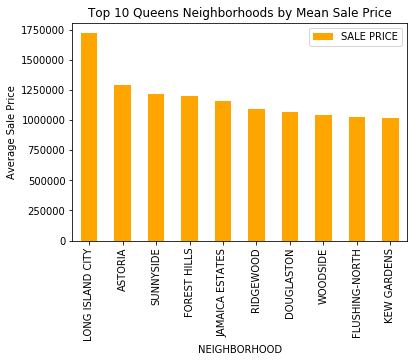

In [108]:
#plotting bar graph of Queens neighborhoods average price
queens_neighborhoods.plot(kind = 'bar', color = 'orange')
plt.ylabel('Average Sale Price')
plt.title('Top 10 Queens Neighborhoods by Mean Sale Price')

In [109]:
#top 10 highest average priced neighborhoods in Staten Island
staten = df_m[df_m['BOROUGH'] == 'Staten Island']
staten_neighborhoods = staten.pivot_table(index = 'NEIGHBORHOOD', values = 'SALE PRICE', aggfunc = np.mean\
).sort_values(by = 'SALE PRICE', ascending = False)[:10]
staten_neighborhoods

,SALE PRICE
NEIGHBORHOOD,
TODT HILL,1383113
ROSSVILLE-PORT MOBIL,1323819
BLOOMFIELD,1321110
DONGAN HILLS-COLONY,1106615
EMERSON HILL,1080433
RICHMONDTOWN-LIGHTHS HILL,1052289
ROSSVILLE-RICHMOND VALLEY,1004881
SUNNYSIDE,992116
RICHMONDTOWN,979289


Text(0.5,1,'Top 10 Staten Island Neighborhoods by Mean Sale Price')

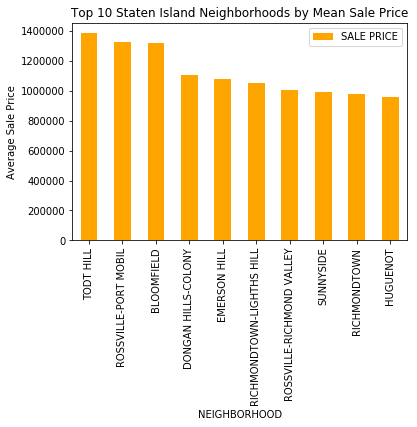

In [110]:
#plotting bar graph of Staten Island neighborhoods average price
staten_neighborhoods.plot(kind = 'bar', color = 'orange')
plt.ylabel('Average Sale Price')
plt.title('Top 10 Staten Island Neighborhoods by Mean Sale Price')

In [111]:
#top 10 highest average priced neighborhoods in the Bronx
bronx = df_m[df_m['BOROUGH'] == 'Bronx']
bronx_neighborhoods = bronx.pivot_table(index = 'NEIGHBORHOOD', values = 'SALE PRICE', aggfunc = np.mean\
).sort_values(by = 'SALE PRICE', ascending = False)[:10]
bronx_neighborhoods

,SALE PRICE
NEIGHBORHOOD,
PELHAM BAY,1522637
MOTT HAVEN/PORT MORRIS,1101917
BELMONT,1064570
HUNTS POINT,1045550
BATHGATE,951660
MOUNT HOPE/MOUNT EDEN,932136
WESTCHESTER,922895
CROTONA PARK,912239
FIELDSTON,904068


Text(0.5,1,'Top 10 Bronx Neighborhoods by Mean Sale Price')

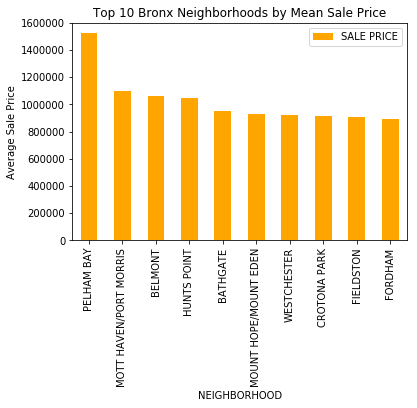

In [112]:
#plotting bar graph of Bronx neighborhoods average price
bronx_neighborhoods.plot(kind = 'bar', color = 'orange')
plt.ylabel('Average Sale Price')
plt.title('Top 10 Bronx Neighborhoods by Mean Sale Price')

These graphs are mainly consistent from what we have seen about the average prices of properties by borough. Despite the Bronx having the lowest median price per borough, their top priced neighborhood, Pelham Bay, has a higher average sale price than any neighborhood in Queens or Staten Island other than Long Island City. Javits Center in Manhattan is the highest overall priced neighborhood on average while Manhattan holds the top 10 overall priced neighborhoods. There 10th most expensive neighborhood is almost double Brooklyn's highest, the next borough with the top priced neighborhoods.

In [113]:
#top 10 highest average priced neighborhoods in Manhattan
manhattan = df_m[df_m['BOROUGH'] == 'Manhattan']
manhattan_neighborhoods = manhattan.pivot_table(index = 'NEIGHBORHOOD', values = 'SALE PRICE', aggfunc = np.mean\
).sort_values(by = 'SALE PRICE', ascending = False)[:10]
manhattan_neighborhoods

,SALE PRICE
NEIGHBORHOOD,
CIVIC CENTER,1678135
LITTLE ITALY,1662857
TRIBECA,1584928
SOHO,1536621
FLATIRON,1522352
CHINATOWN,1483837
FASHION,1461784
UPPER EAST SIDE (96-110),1461339
FINANCIAL,1382813


Text(0.5,1,'Top 10 Manhattan Neighborhoods by Mean Sale Price')

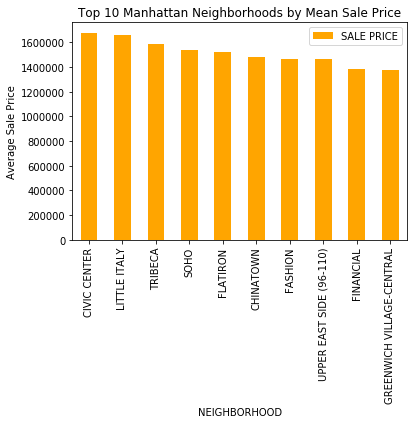

In [114]:
#plotting bar graph of Manhattan neighborhoods average price
manhattan_neighborhoods.plot(kind = 'bar', color = 'orange')
plt.ylabel('Average Sale Price')
plt.title('Top 10 Manhattan Neighborhoods by Mean Sale Price')

In [115]:
#top 10 highest average priced neighborhoods in Brooklyn
brooklyn = df_m[df_m['BOROUGH'] == 'Brooklyn']
brooklyn_neighborhoods = brooklyn.pivot_table(index = 'NEIGHBORHOOD', values = 'SALE PRICE', aggfunc = np.mean\
).sort_values(by = 'SALE PRICE', ascending = False)[:10]
brooklyn_neighborhoods

,SALE PRICE
NEIGHBORHOOD,
CARROLL GARDENS,1567695
JAMAICA BAY,1522637
GOWANUS,1472699
DOWNTOWN-FULTON FERRY,1459779
DOWNTOWN-FULTON MALL,1413034
RED HOOK,1397154
BOERUM HILL,1390574
PARK SLOPE SOUTH,1370813
WYCKOFF HEIGHTS,1358311


Text(0.5,1,'Top 10 Brooklyn Neighborhoods by Mean Sale Price')

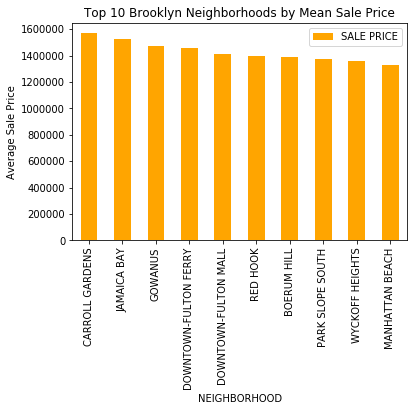

In [116]:
#plotting bar graph of Brooklyn neighborhoods average price
brooklyn_neighborhoods.plot(kind = 'bar', color = 'orange')
plt.ylabel('Average Sale Price')
plt.title('Top 10 Brooklyn Neighborhoods by Mean Sale Price')

In [117]:
#top 10 highest average priced neighborhoods in Queens
queens = df_m[df_m['BOROUGH'] == 'Queens']
queens_neighborhoods = queens.pivot_table(index = 'NEIGHBORHOOD', values = 'SALE PRICE', aggfunc = np.mean\
).sort_values(by = 'SALE PRICE', ascending = False)[:10]
queens_neighborhoods

,SALE PRICE
NEIGHBORHOOD,
RIDGEWOOD,1254111
LONG ISLAND CITY,1242146
ASTORIA,1226473
JAMAICA ESTATES,1170978
NEPONSIT,1131279
MIDDLE VILLAGE,1042338
COLLEGE POINT,1040718
MASPETH,1031921
WHITESTONE,1019199


Text(0.5,1,'Top 10 Queens Neighborhoods by Mean Sale Price')

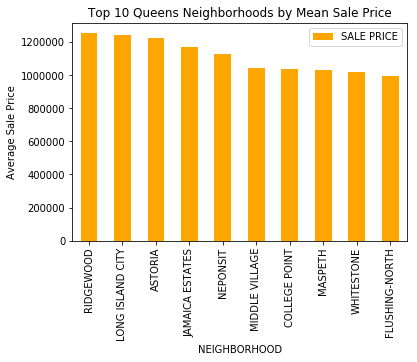

In [118]:
#plotting bar graph of Queens neighborhoods average price
queens_neighborhoods.plot(kind = 'bar', color = 'orange')
plt.ylabel('Average Sale Price')
plt.title('Top 10 Queens Neighborhoods by Mean Sale Price')

In [119]:
#top 10 highest average priced neighborhoods in Staten Island
staten = df_m[df_m['BOROUGH'] == 'Staten Island']
staten_neighborhoods = staten.pivot_table(index = 'NEIGHBORHOOD', values = 'SALE PRICE', aggfunc = np.mean\
).sort_values(by = 'SALE PRICE', ascending = False)[:10]
staten_neighborhoods

,SALE PRICE
NEIGHBORHOOD,
TODT HILL,1383113
ROSSVILLE-PORT MOBIL,1323819
BLOOMFIELD,1321110
DONGAN HILLS-COLONY,1106615
EMERSON HILL,1080433
RICHMONDTOWN-LIGHTHS HILL,1052289
ROSSVILLE-RICHMOND VALLEY,1004881
SUNNYSIDE,992116
RICHMONDTOWN,979289


Text(0.5,1,'Top 10 Staten Island Neighborhoods by Mean Sale Price')

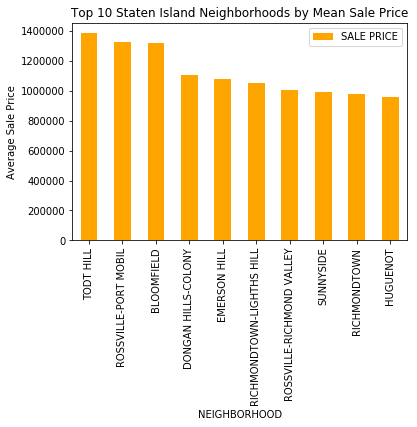

In [120]:
#plotting bar graph of Staten Island neighborhoods average price
staten_neighborhoods.plot(kind = 'bar', color = 'orange')
plt.ylabel('Average Sale Price')
plt.title('Top 10 Staten Island Neighborhoods by Mean Sale Price')

In [121]:
#top 10 highest average priced neighborhoods in the Bronx
bronx = df_m[df_m['BOROUGH'] == 'Bronx']
bronx_neighborhoods = bronx.pivot_table(index = 'NEIGHBORHOOD', values = 'SALE PRICE', aggfunc = np.mean\
).sort_values(by = 'SALE PRICE', ascending = False)[:10]
bronx_neighborhoods

,SALE PRICE
NEIGHBORHOOD,
PELHAM BAY,1522637
MOTT HAVEN/PORT MORRIS,1101917
BELMONT,1064570
HUNTS POINT,1045550
BATHGATE,951660
MOUNT HOPE/MOUNT EDEN,932136
WESTCHESTER,922895
CROTONA PARK,912239
FIELDSTON,904068


Text(0.5,1,'Top 10 Bronx Neighborhoods by Mean Sale Price')

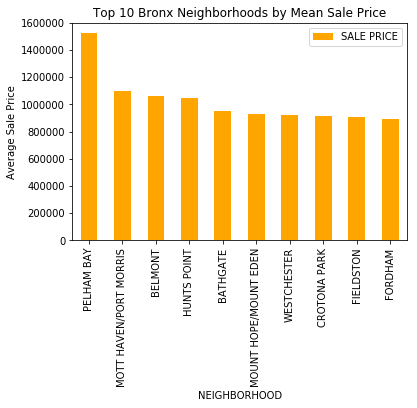

In [122]:
#plotting bar graph of Bronx neighborhoods average price
bronx_neighborhoods.plot(kind = 'bar', color = 'orange')
plt.ylabel('Average Sale Price')
plt.title('Top 10 Bronx Neighborhoods by Mean Sale Price')

## Machine Learning

In [123]:
#choose the variables to be used in the model, using dataframe without nulls but has zeros
columns = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'COMMERCIAL UNITS','GROSS SQUARE FEET','SALE PRICE',
'BUILDING AGE', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS','Month','Season']
data_model = df_o.loc[:,columns]

In [124]:
#select variables to be one hot encoded
onf = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'Month', 'Season']

#for each categorical column find unique number of categories
#this tells us how many columns we are adding to the dataset
longest_str = max(onf, key = len)
total_num_unique_categorical = 0
for feature in onf:
    num_unique = len(df_m[feature].unique())
    print('{col:<{fill_col}} : {num:d} unique categorical values.'.format(col = feature, fill_col = len(longest_str),
                                                                          num = num_unique))
    total_num_unique_categorical += num_unique
print('{total:d} columns will be added during one-hot encoding.'.format(total = total_num_unique_categorical))

BOROUGH                 : 5 unique categorical values.
BUILDING CLASS CATEGORY : 42 unique categorical values.
Month                   : 12 unique categorical values.
Season                  : 4 unique categorical values.
63 columns will be added during one-hot encoding.


In [125]:
#convert categorical variables into dummy variables
ohe = pd.get_dummies(data_model[onf])
ohe.info(verbose = True, memory_usage = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35007 entries, 3 to 84545
Data columns (total 57 columns):
BOROUGH_Bronx                                                       35007 non-null uint8
BOROUGH_Brooklyn                                                    35007 non-null uint8
BOROUGH_Manhattan                                                   35007 non-null uint8
BOROUGH_Queens                                                      35007 non-null uint8
BOROUGH_Staten Island                                               35007 non-null uint8
BUILDING CLASS CATEGORY_2-10 UNIT RESIDENTIAL                       35007 non-null uint8
BUILDING CLASS CATEGORY_4-10 UNIT RESIDENTIAL                       35007 non-null uint8
BUILDING CLASS CATEGORY_ASYLUMS AND HOMES                           35007 non-null uint8
BUILDING CLASS CATEGORY_COMMERCIAL CONDOS                           35007 non-null uint8
BUILDING CLASS CATEGORY_COMMERCIAL GARAGES                          35007 non-null uint8
B

In [126]:
#delete old columns
data_model = data_model.drop(onf, axis = 1)

#add new one hot encoded variables
data_model = pd.concat([data_model, ohe], axis = 1)
data_model.head()

,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE,LAND SQUARE FEET,RESIDENTIAL UNITS,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,BUILDING CLASS CATEGORY_2-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_4-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_COMMERCIAL CONDOS,BUILDING CLASS CATEGORY_COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_CONDO - COOPS,BUILDING CLASS CATEGORY_CONDO - CULTURAL/MEDICAL/EDUCATIONAL/ETC,BUILDING CLASS CATEGORY_CONDO - NON-BUSINESS STORAGE,BUILDING CLASS CATEGORY_CONDO - OFFICE BUILDINGS,BUILDING CLASS CATEGORY_CONDO - PARKING,BUILDING CLASS CATEGORY_CONDO - RENTALS,BUILDING CLASS CATEGORY_CONDO - STORE BUILDINGS,BUILDING CLASS CATEGORY_CONDO - TERRACES/GARDENS/CABANAS,BUILDING CLASS CATEGORY_EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_FACTORIES,BUILDING CLASS CATEGORY_HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_LOFT BUILDINGS,BUILDING CLASS CATEGORY_OFFICE BUILDINGS,BUILDING CLASS CATEGORY_ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_OTHER HOTELS,BUILDING CLASS CATEGORY_OUTDOOR RECREATIONAL FACILITIES,BUILDING CLASS CATEGORY_RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_SPECIAL CONDO BILLING LOTS,BUILDING CLASS CATEGORY_STORE BUILDINGS,BUILDING CLASS CATEGORY_TAX CLASS 1 - CONDOS,BUILDING CLASS CATEGORY_TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_TAX CLASS 1 - VACANT LAND,BUILDING CLASS CATEGORY_TAX CLASS 4 - OTHER,BUILDING CLASS CATEGORY_THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_TRANSPORTATION FACILITIES,BUILDING CLASS CATEGORY_TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_WALKUP APARTMENTS,BUILDING CLASS CATEGORY_WAREHOUSES,Month_APR,Month_AUG,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP,Season_Fall,Season_Spring,Season_Summer,Season_Winter
3,0,6794,3936272,103,2272,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
6,0,4226,3192840,96,1750,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
172,1,3360,3300000,106,1520,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
174,1,3713,4750000,107,1779,5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
195,1,3586,3700000,117,1218,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [127]:
#need to change zero values to 1 to be able to take its log
#add 1 to each data value in units
data_model['COMMERCIAL UNITS'] = data_model['COMMERCIAL UNITS'] + 1
data_model['RESIDENTIAL UNITS'] = data_model['RESIDENTIAL UNITS'] + 1
data_model['BUILDING AGE'] = data_model['BUILDING AGE'] + 1
data_model['SALE PRICE'] = data_model['SALE PRICE'] + 1
data_model['GROSS SQUARE FEET'] = data_model['GROSS SQUARE FEET'] + 1
data_model['LAND SQUARE FEET'] = data_model['LAND SQUARE FEET'] + 1

#take log and standardize unit values and building age
data_model['COMMERCIAL UNITS'] = StandardScaler().fit_transform(np.log(data_model['COMMERCIAL UNITS']).\
values.reshape(-1,1))
data_model['RESIDENTIAL UNITS'] = StandardScaler().fit_transform(np.log(data_model['RESIDENTIAL UNITS']).values.\
reshape(-1,1))
data_model['BUILDING AGE'] = StandardScaler().fit_transform(np.log(data_model['BUILDING AGE']).values.reshape(-1,1))

In [128]:
#take log and standardize price and square footage
data_model['SALE PRICE'] = StandardScaler().fit_transform(np.log(data_model['SALE PRICE']).values.reshape(-1,1))
data_model['GROSS SQUARE FEET'] = StandardScaler().fit_transform(np.log(data_model['GROSS SQUARE FEET'])\
.values.reshape(-1,1))
data_model['LAND SQUARE FEET'] = StandardScaler().fit_transform(np.log(data_model['LAND SQUARE FEET'])\
.values.reshape(-1,1))

In [129]:
#split data into training and testing set with 80% of the data going into training set and 20% into the test set
training, testing = train_test_split(data_model, test_size = 0.2, random_state = 0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
%(data_model.shape[0],training.shape[0],testing.shape[0]))

Total sample size = 35007; training sample size = 28005, testing sample size = 7002


In [130]:
#establishing training and test set variables for x and y, dropping price from models
df_train = training.loc[:,data_model.columns]
X_train = df_train.drop(['SALE PRICE'], axis=1)
y_train = df_train.loc[:, ['SALE PRICE']]

df_test = testing.loc[:,data_model.columns]
X_test = df_test.drop(['SALE PRICE'], axis=1)
y_test = df_test.loc[:, ['SALE PRICE']]

In [131]:
#linear regression model:

#create the regressor: linreg
linreg = LinearRegression()

#fit regressor to the training data
linreg.fit(X_train, y_train)

#predict the labels of the test set: y_pred
y_pred = linreg.predict(X_test)

#compute 5-fold cross-validation scores: cv_scores
cv_scores_linreg = cross_val_score(linreg, X_train, y_train, cv = 5)

In [132]:
#compute scores
print("R^2: {:.3f}".format(linreg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.3f}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
#print the 5-fold cross-validation scores
print(cv_scores_linreg)

R^2: -16092131431196237824.000
Root Mean Squared Error: 4020494475.945
Average 5-Fold CV Score: -3.7446265252874486e+19
[-1.72903580e+20 -1.29149249e+19 -1.51537935e+17  2.93069491e-01
 -1.26128389e+18]


In [133]:
#setting up a random forest regressor
rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

y_pred_s_rf = rf_reg.predict(X_test)

#compute 5-fold cross-validation scores
cv_scores_rf = cross_val_score(rf_reg, X_train, y_train, cv = 5)

/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConver

In [134]:
#compute and print scores
print("R^2: {:.3f}".format(rf_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_s_rf))
print("Root Mean Squared Error: {:.3f}".format(rmse))

print("Average 5-Fold CV Score: {:.5f}".format(np.mean(cv_scores_rf)))
#print the 5-fold cross-validation scores
print(cv_scores_rf)

R^2: 0.447
Root Mean Squared Error: 0.745
Average 5-Fold CV Score: 0.42970
[0.4287971  0.44980749 0.43517681 0.40149778 0.43321305]


In [135]:
#calculating feature importances of random forest
feature_importance = pd.DataFrame(list(zip(X_train.columns, np.transpose(rf_reg.feature_importances_))))\
.sort_values(1, ascending = False)
feature_importance = feature_importance.rename(columns = {0:'Feature',1:'Value'})

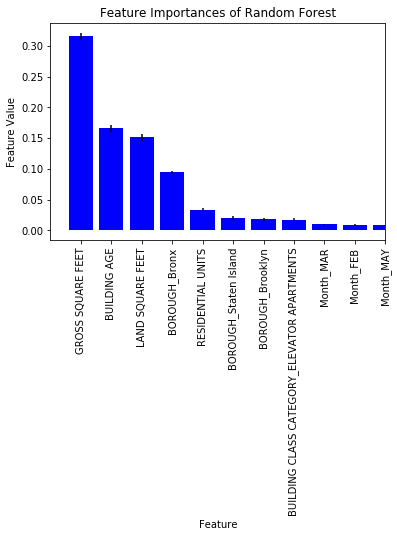

In [136]:
#setting up data for plot
importances = rf_reg.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# plot the feature importances of the random forest
plt.figure()
plt.title("Feature Importances of Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices],  
       color = "b", yerr = std[indices], align = "center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation = 90)
plt.xlim([-1, 10])
plt.xlabel('Feature')
plt.ylabel('Feature Value')
plt.show()

Based on our feature importance chart, gross square footage is the most important feature in the model, followed by building age, and land square footage. The most important feature for borough is the Bronx, which is not surprising given it has consistently been the lowest priced borough. 

In [137]:
#setup ridge regressor
ridge = Ridge(alpha = 0.01, normalize = True)

#fit the model
ridge.fit(X_train, y_train)

#predict
y_pred_s_ridge = ridge.predict(X_test)

#perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X_train, y_train, cv = 5)

In [138]:
#compute and print scores for ridge regression
print("R^2: {:.3}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_s_ridge))
print("Root Mean Squared Error: {:.3}".format(rmse))

print("Average 5-Fold CV Score: {:.5}".format(np.mean(ridge_cv)))
# Print the 5-fold cross-validation scores
print(ridge_cv)

R^2: 0.303
Root Mean Squared Error: 0.837
Average 5-Fold CV Score: 0.30289
[0.30552408 0.31068041 0.30578442 0.29296507 0.29947233]


In [139]:
#ElasticNet and GridSearch

#create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

#instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

#setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv = 5)

#fit to training data
gm_cv.fit(X_train, y_train)

#predict on the test set and compute metrics
y_pred_elas = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_elas)

/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceW

In [140]:
#print scores
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {:.4f}".format(r2))
print("Tuned ElasticNet MSE: {:.4f}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.1473
Tuned ElasticNet MSE: 0.8565


In [141]:
#choose the variables to be used in the model, using dataframe df_m with average values and without upper outliers
columns = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'COMMERCIAL UNITS','GROSS SQUARE FEET','SALE PRICE',
'BUILDING AGE', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS','Month','Season']
data_model = df_m.loc[:,columns]

In [142]:
#select variables to be one hot encoded
onf = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'Month', 'Season']

#for each categorical column find unique number of categories
#this tells us how many columns we are adding to the dataset
longest_str = max(onf, key = len)
total_num_unique_categorical = 0
for feature in onf:
    num_unique = len(df_m[feature].unique())
    print('{col:<{fill_col}} : {num:d} unique categorical values.'.format(col = feature, fill_col = len(longest_str),
                                                                          num = num_unique))
    total_num_unique_categorical += num_unique
print('{total:d} columns will be added during one-hot encoding.'.format(total = total_num_unique_categorical))

BOROUGH                 : 5 unique categorical values.
BUILDING CLASS CATEGORY : 42 unique categorical values.
Month                   : 12 unique categorical values.
Season                  : 4 unique categorical values.
63 columns will be added during one-hot encoding.


In [143]:
#convert categorical variables into dummy variables
ohe = pd.get_dummies(data_model[onf])
ohe.info(verbose = True, memory_usage = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79709 entries, 1 to 84547
Data columns (total 63 columns):
BOROUGH_Bronx                                                       79709 non-null uint8
BOROUGH_Brooklyn                                                    79709 non-null uint8
BOROUGH_Manhattan                                                   79709 non-null uint8
BOROUGH_Queens                                                      79709 non-null uint8
BOROUGH_Staten Island                                               79709 non-null uint8
BUILDING CLASS CATEGORY_2-10 UNIT RESIDENTIAL                       79709 non-null uint8
BUILDING CLASS CATEGORY_4-10 UNIT RESIDENTIAL                       79709 non-null uint8
BUILDING CLASS CATEGORY_ASYLUMS AND HOMES                           79709 non-null uint8
BUILDING CLASS CATEGORY_COMMERCIAL CONDOS                           79709 non-null uint8
BUILDING CLASS CATEGORY_COMMERCIAL GARAGES                          79709 non-null uint8
B

In [144]:
#delete old columns
data_model = data_model.drop(onf, axis = 1)

#add new one hot encoded variables
data_model = pd.concat([data_model, ohe], axis = 1)
data_model.head()

,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE,LAND SQUARE FEET,RESIDENTIAL UNITS,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,BUILDING CLASS CATEGORY_2-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_4-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_COMMERCIAL CONDOS,BUILDING CLASS CATEGORY_COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_CONDO - COOPS,BUILDING CLASS CATEGORY_CONDO - CULTURAL/MEDICAL/EDUCATIONAL/ETC,BUILDING CLASS CATEGORY_CONDO - HOTELS,BUILDING CLASS CATEGORY_CONDO - NON-BUSINESS STORAGE,BUILDING CLASS CATEGORY_CONDO - OFFICE BUILDINGS,BUILDING CLASS CATEGORY_CONDO - PARKING,BUILDING CLASS CATEGORY_CONDO - RENTALS,BUILDING CLASS CATEGORY_CONDO - STORE BUILDINGS,BUILDING CLASS CATEGORY_CONDO - TERRACES/GARDENS/CABANAS,BUILDING CLASS CATEGORY_CONDO - WAREHOUSES/FACTORY/INDUS,BUILDING CLASS CATEGORY_EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_FACTORIES,BUILDING CLASS CATEGORY_HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_LOFT BUILDINGS,BUILDING CLASS CATEGORY_LUXURY HOTELS,BUILDING CLASS CATEGORY_OFFICE BUILDINGS,BUILDING CLASS CATEGORY_ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_OTHER HOTELS,BUILDING CLASS CATEGORY_OUTDOOR RECREATIONAL FACILITIES,BUILDING CLASS CATEGORY_RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_SELECTED GOVERNMENTAL FACILITIES,BUILDING CLASS CATEGORY_SPECIAL CONDO BILLING LOTS,BUILDING CLASS CATEGORY_STORE BUILDINGS,BUILDING CLASS CATEGORY_TAX CLASS 1 - CONDOS,BUILDING CLASS CATEGORY_TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_TAX CLASS 1 - VACANT LAND,BUILDING CLASS CATEGORY_TAX CLASS 3 - UNTILITY PROPERTIES,BUILDING CLASS CATEGORY_TAX CLASS 4 - OTHER,BUILDING CLASS CATEGORY_THEATRES,BUILDING CLASS CATEGORY_THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_TRANSPORTATION FACILITIES,BUILDING CLASS CATEGORY_TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_WALKUP APARTMENTS,BUILDING CLASS CATEGORY_WAREHOUSES,Month_APR,Month_AUG,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP,Season_Fall,Season_Spring,Season_Summer,Season_Winter
1,3,18690,1522637,116,4616,28,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,7803,1522637,116,2212,16,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,9730,1522637,117,2581,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7,2,21007,1522637,117,5163,44,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8,0,9198,1522637,97,1534,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [145]:
#take log and standardize price and square footage
data_model['SALE PRICE'] = StandardScaler().fit_transform(np.log(data_model['SALE PRICE']).values.reshape(-1,1))
data_model['GROSS SQUARE FEET'] = StandardScaler().fit_transform(np.log(data_model['GROSS SQUARE FEET'])\
.values.reshape(-1,1))
data_model['LAND SQUARE FEET'] = StandardScaler().fit_transform(np.log(data_model['LAND SQUARE FEET'])\
.values.reshape(-1,1))

In [146]:
#need to change zero values to 1 to be able to take its log
#add 1 to each data value in units
data_model['COMMERCIAL UNITS'] = data_model['COMMERCIAL UNITS'] + 1
data_model['RESIDENTIAL UNITS'] = data_model['RESIDENTIAL UNITS'] + 1
data_model['BUILDING AGE'] = data_model['BUILDING AGE'] + 1

#take log and standardize unit values and building age
data_model['COMMERCIAL UNITS'] = StandardScaler().fit_transform(np.log(data_model['COMMERCIAL UNITS']).\
values.reshape(-1,1))
data_model['RESIDENTIAL UNITS'] = StandardScaler().fit_transform(np.log(data_model['RESIDENTIAL UNITS']).values.\
reshape(-1,1))
data_model['BUILDING AGE'] = StandardScaler().fit_transform(np.log(data_model['BUILDING AGE']).values.reshape(-1,1))

In [147]:
#split data into training and testing set with 80% of the data going into training set and 20% into the test set
training, testing = train_test_split(data_model, test_size = 0.2, random_state = 0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
%(data_model.shape[0],training.shape[0],testing.shape[0]))

Total sample size = 79709; training sample size = 63767, testing sample size = 15942


In [148]:
#establishing training and test set variables for x and y, dropping price from models
df_train = training.loc[:,data_model.columns]
X_train = df_train.drop(['SALE PRICE'], axis=1)
y_train = df_train.loc[:, ['SALE PRICE']]

df_test = testing.loc[:,data_model.columns]
X_test = df_test.drop(['SALE PRICE'], axis=1)
y_test = df_test.loc[:, ['SALE PRICE']]

In [149]:
#linear regression model:

#create the regressor: linreg
linreg = LinearRegression()

#fit regressor to the training data
linreg.fit(X_train, y_train)

#predict the labels of the test set: y_pred
y_pred = linreg.predict(X_test)

#compute 5-fold cross-validation scores: cv_scores
cv_scores_linreg = cross_val_score(linreg, X_train, y_train, cv = 5)

In [150]:
#compute scores
print("R^2: {:.3f}".format(linreg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.3f}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
#print the 5-fold cross-validation scores
print(cv_scores_linreg)

R^2: 0.189
Root Mean Squared Error: 0.897
Average 5-Fold CV Score: -4.60504188652702e+18
[-1.48385143e+19 -7.63589634e+16  1.91011320e-01  2.01206119e-01
 -8.11033617e+18]


In [151]:
#setting up a random forest regressor
rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

y_pred_s_rf = rf_reg.predict(X_test)

#compute 5-fold cross-validation scores
cv_scores_rf = cross_val_score(rf_reg, X_train, y_train, cv = 5)

/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConver

In [152]:
#compute and print scores
print("R^2: {:.3f}".format(rf_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_s_rf))
print("Root Mean Squared Error: {:.3f}".format(rmse))

print("Average 5-Fold CV Score: {:.5f}".format(np.mean(cv_scores_rf)))
# Print the 5-fold cross-validation scores
print(cv_scores_rf)

R^2: 0.174
Root Mean Squared Error: 0.905
Average 5-Fold CV Score: 0.16598
[0.16129846 0.18016286 0.17912653 0.14208922 0.16721909]


In [153]:
#calculating feature importances of random forest
feature_importance = pd.DataFrame(list(zip(X_train.columns, np.transpose(rf_reg.feature_importances_))))\
.sort_values(1, ascending = False)
feature_importance = feature_importance.rename(columns = {0:'Feature',1:'Value'})

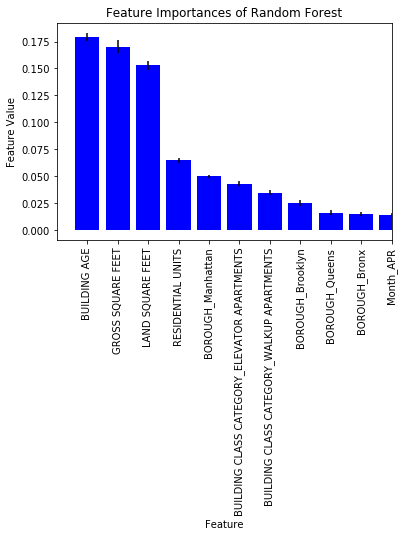

In [154]:
#setting up data for plot
importances = rf_reg.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

#plot the feature importances of the random forest
plt.figure()
plt.title("Feature Importances of Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices],  
       color = "b", yerr = std[indices], align = "center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation = 90)
plt.xlim([-1, 10])
plt.xlabel('Feature')
plt.ylabel('Feature Value')
plt.show()

Based on our dataframe and chart, gross square footage is the most important feature in the model, followed by building age, land square footage then the amount of residential units. The most important feature for borough is Manhattan, which is not surprising given it has consistenly been the top priced borough by wide margins. 

In [155]:
#setup ridge regressor
ridge = Ridge(alpha = 0.01, normalize = True)

#fit the model
ridge.fit(X_train, y_train)

#predict
y_pred_s_ridge = ridge.predict(X_test)

#perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X_train, y_train, cv = 5)

In [156]:
#compute and print scores for ridge regression
print("R^2: {:.3}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_s_ridge))
print("Root Mean Squared Error: {:.3}".format(rmse))

print("Average 5-Fold CV Score: {:.5}".format(np.mean(ridge_cv)))
# Print the 5-fold cross-validation scores
print(ridge_cv)

R^2: 0.189
Root Mean Squared Error: 0.897
Average 5-Fold CV Score: 0.1949
[0.19723403 0.19144762 0.19124274 0.20100839 0.19355558]


In [157]:
#ElasticNet and GridSearch

#create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

#instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

#setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv = 5)

#fit to training data
gm_cv.fit(X_train, y_train)

#predict on the test set and compute metrics
y_pred_elas = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_elas)

/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceW

In [158]:
#print scores
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {:.4f}".format(r2))
print("Tuned ElasticNet MSE: {:.4f}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.0670
Tuned ElasticNet MSE: 0.9251


In [159]:
#choose the variables to be used in the model, using dataframe df including upper outliers
columns = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'COMMERCIAL UNITS','GROSS SQUARE FEET','SALE PRICE',
'BUILDING AGE', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS','Month','Season']
data_model = df.loc[:,columns]

In [160]:
#select variables to be one hot encoded
onf = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'Month','Season']

#for each categorical column find unique number of categories
#this tells us how many columns we are adding to the dataset
longest_str = max(onf, key = len)
total_num_unique_categorical = 0
for feature in onf:
    num_unique = len(df_m[feature].unique())
    print('{col:<{fill_col}} : {num:d} unique categorical values.'.format(col = feature, fill_col = len(longest_str),
                                                                          num = num_unique))
    total_num_unique_categorical += num_unique
print('{total:d} columns will be added during one-hot encoding.'.format(total = total_num_unique_categorical))

BOROUGH                 : 5 unique categorical values.
BUILDING CLASS CATEGORY : 42 unique categorical values.
Month                   : 12 unique categorical values.
Season                  : 4 unique categorical values.
63 columns will be added during one-hot encoding.


In [161]:
#convert categorical variables into dummy variables
ohe = pd.get_dummies(data_model[onf])

In [162]:
#delete old columns
data_model = data_model.drop(onf, axis = 1)

#add new one hot encoded variables
data_model = pd.concat([data_model, ohe], axis = 1)
data_model.head()

,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE,LAND SQUARE FEET,RESIDENTIAL UNITS,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,BUILDING CLASS CATEGORY_2-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_4-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_COMMERCIAL CONDOS,BUILDING CLASS CATEGORY_COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_CONDO - COOPS,BUILDING CLASS CATEGORY_CONDO - CULTURAL/MEDICAL/EDUCATIONAL/ETC,BUILDING CLASS CATEGORY_CONDO - HOTELS,BUILDING CLASS CATEGORY_CONDO - NON-BUSINESS STORAGE,BUILDING CLASS CATEGORY_CONDO - OFFICE BUILDINGS,BUILDING CLASS CATEGORY_CONDO - PARKING,BUILDING CLASS CATEGORY_CONDO - RENTALS,BUILDING CLASS CATEGORY_CONDO - STORE BUILDINGS,BUILDING CLASS CATEGORY_CONDO - TERRACES/GARDENS/CABANAS,BUILDING CLASS CATEGORY_CONDO - WAREHOUSES/FACTORY/INDUS,BUILDING CLASS CATEGORY_EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_FACTORIES,BUILDING CLASS CATEGORY_HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_LOFT BUILDINGS,BUILDING CLASS CATEGORY_LUXURY HOTELS,BUILDING CLASS CATEGORY_OFFICE BUILDINGS,BUILDING CLASS CATEGORY_ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_OTHER HOTELS,BUILDING CLASS CATEGORY_OUTDOOR RECREATIONAL FACILITIES,BUILDING CLASS CATEGORY_RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_SELECTED GOVERNMENTAL FACILITIES,BUILDING CLASS CATEGORY_SPECIAL CONDO BILLING LOTS,BUILDING CLASS CATEGORY_STORE BUILDINGS,BUILDING CLASS CATEGORY_TAX CLASS 1 - CONDOS,BUILDING CLASS CATEGORY_TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_TAX CLASS 1 - VACANT LAND,BUILDING CLASS CATEGORY_TAX CLASS 3 - UNTILITY PROPERTIES,BUILDING CLASS CATEGORY_TAX CLASS 4 - OTHER,BUILDING CLASS CATEGORY_THEATRES,BUILDING CLASS CATEGORY_THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_TRANSPORTATION FACILITIES,BUILDING CLASS CATEGORY_TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_WALKUP APARTMENTS,BUILDING CLASS CATEGORY_WAREHOUSES,Month_APR,Month_AUG,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,0,6440,6625000,117,1633,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,3,18690,1522637,116,4616,28,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,7803,1522637,116,2212,16,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,6794,3936272,103,2272,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,0,4615,8000000,116,2369,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [163]:
# take log and standardize price and square footage
data_model['SALE PRICE'] = StandardScaler().fit_transform(np.log(data_model['SALE PRICE']).values.reshape(-1,1))
data_model['GROSS SQUARE FEET'] = StandardScaler().fit_transform(np.log(data_model['GROSS SQUARE FEET'])\
.values.reshape(-1,1))
data_model['LAND SQUARE FEET'] = StandardScaler().fit_transform(np.log(data_model['LAND SQUARE FEET'])\
.values.reshape(-1,1))

In [164]:
#need to change zero values to 1 to be able to take its log
#add 1 to each data value in units and building age
data_model['COMMERCIAL UNITS'] = data_model['COMMERCIAL UNITS'] + 1
data_model['RESIDENTIAL UNITS'] = data_model['RESIDENTIAL UNITS'] + 1
data_model['BUILDING AGE'] = data_model['BUILDING AGE'] + 1

#take log and standardize unit values and building age
data_model['COMMERCIAL UNITS'] = StandardScaler().fit_transform(np.log(data_model['COMMERCIAL UNITS']).\
values.reshape(-1,1))
data_model['RESIDENTIAL UNITS'] = StandardScaler().fit_transform(np.log(data_model['RESIDENTIAL UNITS']).values.\
reshape(-1,1))
data_model['BUILDING AGE'] = StandardScaler().fit_transform(np.log(data_model['BUILDING AGE']).values.reshape(-1,1))

In [165]:
#split data into training and testing set with 80% of the data going into training set

training, testing = train_test_split(data_model, test_size = 0.2, random_state = 0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
%(data_model.shape[0],training.shape[0],testing.shape[0]))

Total sample size = 83783; training sample size = 67026, testing sample size = 16757


In [166]:
#establishing training and test set variables for x and y, dropping price from models
df_train = training.loc[:,data_model.columns]
X_train = df_train.drop(['SALE PRICE'], axis=1)
y_train = df_train.loc[:, ['SALE PRICE']]

df_test = testing.loc[:,data_model.columns]
X_test = df_test.drop(['SALE PRICE'], axis=1)
y_test = df_test.loc[:, ['SALE PRICE']]

In [167]:
#linear regressor
#create the regressor: linreg
linreg = LinearRegression()

#fit regressor to the training data
linreg.fit(X_train, y_train)

#predict the labels of the test set: y_pred
y_pred = linreg.predict(X_test)

#compute 5-fold cross-validation scores: cv_scores
cv_scores_linreg = cross_val_score(linreg, X_train, y_train, cv = 5)

In [168]:
#compute scores
print("R^2: {:.3f}".format(linreg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.3f}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
#print the 5-fold cross-validation scores
print(cv_scores_linreg)

R^2: 0.278
Root Mean Squared Error: 0.861
Average 5-Fold CV Score: -1.7892384042431547e+18
[ 2.63405483e-01  2.60810577e-01  2.77369847e-01 -8.94619202e+18
  2.55172872e-01]


In [169]:
#setting up a random forest regressor
rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

y_pred_s_rf = rf_reg.predict(X_test)

#compute 5-fold cross-validation scores: cv_scores
cv_scores_rf = cross_val_score(rf_reg, X_train, y_train, cv = 5)

/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConver

In [170]:
#compute and print scores
print("R^2: {:.3f}".format(rf_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_s_rf))
print("Root Mean Squared Error: {:.3f}".format(rmse))

print("Average 5-Fold CV Score: {:.5f}".format(np.mean(cv_scores_rf)))
# Print the 5-fold cross-validation scores
print(cv_scores_rf)

R^2: 0.271
Root Mean Squared Error: 0.865
Average 5-Fold CV Score: 0.24923
[0.26105479 0.2189147  0.26460067 0.26100433 0.24057206]


In [171]:
#calculating feature importances of random forest
feature_importance = pd.DataFrame(list(zip(X_train.columns, np.transpose(rf_reg.feature_importances_))))\
.sort_values(1, ascending = False)
feature_importance = feature_importance.rename(columns = {0:'Feature',1:'Value'})

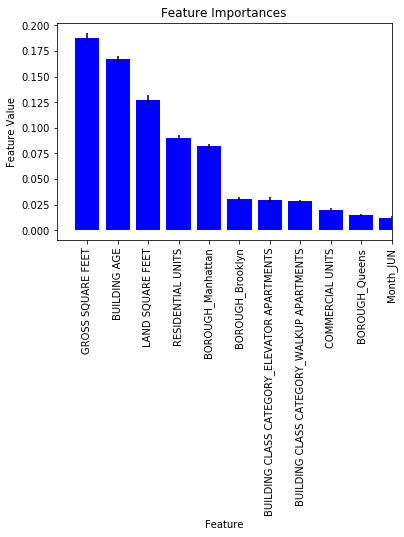

In [172]:
#setting up data for plot
importances = rf_reg.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# plot the feature importances of the random forest
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],  
       color = "b", yerr = std[indices], align = "center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation = 90)
plt.xlim([-1, 10])
plt.xlabel('Feature')
plt.ylabel('Feature Value')
plt.show()

In [173]:
#setup ridge regressor
ridge = Ridge(alpha = 0.01, normalize = True)

#fit the model
ridge.fit(X_train, y_train)

#predict
y_pred_s_ridge = ridge.predict(X_test)

#perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X_train, y_train, cv = 5)

In [174]:
#compute and print scores for ridge regression
print("R^2: {:.3}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_s_ridge))
print("Root Mean Squared Error: {:.3}".format(rmse))

print("Average 5-Fold CV Score: {:.5}".format(np.mean(ridge_cv)))
# Print the 5-fold cross-validation scores
print(ridge_cv)

R^2: 0.278
Root Mean Squared Error: 0.861
Average 5-Fold CV Score: 0.26461
[0.26556808 0.26257665 0.27898279 0.26078695 0.2551135 ]


In [175]:
#ElasticNet and GridSearch
#create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

#instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

#setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv = 5)

#fit to training data
gm_cv.fit(X_train, y_train)

#predict on the test set and compute metrics
y_pred_elas = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_elas)

/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceW

In [176]:
#print scores
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {:.4f}".format(r2))
print("Tuned ElasticNet MSE: {:.4f}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.1156
Tuned ElasticNet MSE: 0.9075


In [177]:
#choose the variables to be used in the model, using dataframe df_n that removes all null and zero values
columns = ['BOROUGH','BUILDING CLASS CATEGORY','COMMERCIAL UNITS','GROSS SQUARE FEET','SALE PRICE',
'BUILDING AGE','LAND SQUARE FEET','RESIDENTIAL UNITS','Month','Season']
data_model = df_n.loc[:,columns]

In [178]:
#select variables to be one hot encoded
onf = ['BOROUGH', 'BUILDING CLASS CATEGORY', 'Month', 'Season']

#for each categorical column find unique number of categories
#this tells us how many columns we are adding to the dataset
longest_str = max(onf, key = len)
total_num_unique_categorical = 0
for feature in onf:
    num_unique = len(df_m[feature].unique())
    print('{col:<{fill_col}} : {num:d} unique categorical values.'.format(col = feature, fill_col = len(longest_str),
                                                                          num = num_unique))
    total_num_unique_categorical += num_unique
print('{total:d} columns will be added during one-hot encoding.'.format(total = total_num_unique_categorical))

BOROUGH                 : 5 unique categorical values.
BUILDING CLASS CATEGORY : 42 unique categorical values.
Month                   : 12 unique categorical values.
Season                  : 4 unique categorical values.
63 columns will be added during one-hot encoding.


In [179]:
#convert categorical variables into dummy variables
ohe = pd.get_dummies(data_model[onf])

In [180]:
#delete old columns
data_model = data_model.drop(onf, axis = 1)

#add new one hot encoded variables
data_model = pd.concat([data_model, ohe], axis = 1)
data_model.head()

,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE,LAND SQUARE FEET,RESIDENTIAL UNITS,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,BUILDING CLASS CATEGORY_4-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_CONDO - RENTALS,BUILDING CLASS CATEGORY_EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_FACTORIES,BUILDING CLASS CATEGORY_HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_LOFT BUILDINGS,BUILDING CLASS CATEGORY_LUXURY HOTELS,BUILDING CLASS CATEGORY_OFFICE BUILDINGS,BUILDING CLASS CATEGORY_ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_OTHER HOTELS,BUILDING CLASS CATEGORY_OUTDOOR RECREATIONAL FACILITIES,BUILDING CLASS CATEGORY_RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_SELECTED GOVERNMENTAL FACILITIES,BUILDING CLASS CATEGORY_STORE BUILDINGS,BUILDING CLASS CATEGORY_TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_TAX CLASS 1 - VACANT LAND,BUILDING CLASS CATEGORY_TAX CLASS 4 - OTHER,BUILDING CLASS CATEGORY_THEATRES,BUILDING CLASS CATEGORY_THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_WALKUP APARTMENTS,BUILDING CLASS CATEGORY_WAREHOUSES,Month_APR,Month_AUG,Month_DEC,Month_FEB,Month_JAN,Month_JUL,Month_JUN,Month_MAR,Month_MAY,Month_NOV,Month_OCT,Month_SEP,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,0,6440,6625000,117,1633,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,0,6794,3936272,103,2272,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,0,4615,8000000,116,2369,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
6,0,4226,3192840,96,1750,8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
9,0,18523,16232000,96,4489,24,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [181]:
#take log and standardize price and square footage
data_model['SALE PRICE'] = StandardScaler().fit_transform(np.log(data_model['SALE PRICE']).values.reshape(-1,1))
data_model['GROSS SQUARE FEET'] = StandardScaler().fit_transform(np.log(data_model['GROSS SQUARE FEET'])\
.values.reshape(-1,1))
data_model['LAND SQUARE FEET'] = StandardScaler().fit_transform(np.log(data_model['LAND SQUARE FEET'])\
.values.reshape(-1,1))

In [182]:
#change zero values to 1 to be able to take its log
#add 1 to each data value in units and building age
data_model['COMMERCIAL UNITS'] = data_model['COMMERCIAL UNITS'] + 1
data_model['RESIDENTIAL UNITS'] = data_model['RESIDENTIAL UNITS'] + 1
data_model['BUILDING AGE'] = data_model['BUILDING AGE'] + 1

#take log and standardize unit values and building age
data_model['COMMERCIAL UNITS'] = StandardScaler().fit_transform(np.log(data_model['COMMERCIAL UNITS']).\
values.reshape(-1,1))
data_model['RESIDENTIAL UNITS'] = StandardScaler().fit_transform(np.log(data_model['RESIDENTIAL UNITS']).values.\
reshape(-1,1))
data_model['BUILDING AGE'] = StandardScaler().fit_transform(np.log(data_model['BUILDING AGE']).values.reshape(-1,1))

In [183]:
#split data into training and testing set with 80% of the data going into training set

training, testing = train_test_split(data_model, test_size = 0.2, random_state = 0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
%(data_model.shape[0],training.shape[0],testing.shape[0]))

Total sample size = 29162; training sample size = 23329, testing sample size = 5833


In [184]:
#establishing training and test set variables for x and y, dropping price from models
df_train = training.loc[:,data_model.columns]
X_train = df_train.drop(['SALE PRICE'], axis=1)
y_train = df_train.loc[:, ['SALE PRICE']]

df_test = testing.loc[:,data_model.columns]
X_test = df_test.drop(['SALE PRICE'], axis=1)
y_test = df_test.loc[:, ['SALE PRICE']]

In [185]:
#linear regression model:
#create the regressor: linreg
linreg = LinearRegression()

#fit regressor to the training data
linreg.fit(X_train, y_train)

#predict the labels of the test set: y_pred
y_pred = linreg.predict(X_test)

#compute 5-fold cross-validation scores: cv_scores
cv_scores_linreg = cross_val_score(linreg, X_train, y_train, cv = 5)

In [186]:
#compute scores
print("R^2: {:.3f}".format(linreg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.3f}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
#print the 5-fold cross-validation scores
print(cv_scores_linreg)

R^2: 0.074
Root Mean Squared Error: 0.978
Average 5-Fold CV Score: 0.0780536013513172
[0.08932623 0.06339105 0.07006086 0.06966762 0.09782226]


In [187]:
#setting up a random forest regressor
rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

y_pred_s_rf = rf_reg.predict(X_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_rf = cross_val_score(rf_reg, X_train, y_train, cv = 5)

/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConver

In [188]:
#compute and print scores
print("R^2: {:.3f}".format(rf_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_s_rf))
print("Root Mean Squared Error: {:.3f}".format(rmse))

print("Average 5-Fold CV Score: {:.5f}".format(np.mean(cv_scores_rf)))
# print the 5-fold cross-validation scores
print(cv_scores_rf)

R^2: -0.066
Root Mean Squared Error: 1.049
Average 5-Fold CV Score: -0.06655
[-0.03245468 -0.08069875 -0.10194674 -0.07909416 -0.03853894]


In [189]:
#calculating feature importances of random forest
feature_importance = pd.DataFrame(list(zip(X_train.columns, np.transpose(rf_reg.feature_importances_))))\
.sort_values(1, ascending = False)
feature_importance = feature_importance.rename(columns = {0:'Feature',1:'Value'})

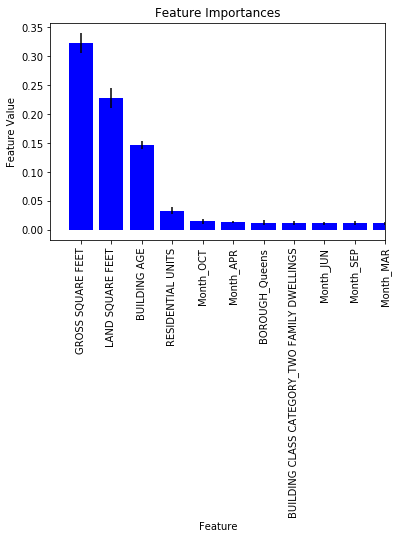

In [190]:
#setting up data for plot
importances = rf_reg.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# plot the feature importances of the random forest
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],  
       color = "b", yerr = std[indices], align = "center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation = 90)
plt.xlim([-1, 10])
plt.xlabel('Feature')
plt.ylabel('Feature Value')
plt.show()

In [191]:
#setup ridge regressor
ridge = Ridge(alpha = 0.01, normalize = True)

#fit the model
ridge.fit(X_train, y_train)

#predict
y_pred_s_ridge = ridge.predict(X_test)

#perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X_train, y_train, cv = 5)

In [192]:
#compute and print scores for ridge regression
print("R^2: {:.3}".format(ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_s_ridge))
print("Root Mean Squared Error: {:.3}".format(rmse))

print("Average 5-Fold CV Score: {:.5}".format(np.mean(ridge_cv)))
# Print the 5-fold cross-validation scores
print(ridge_cv)

R^2: 0.0737
Root Mean Squared Error: 0.978
Average 5-Fold CV Score: 0.078234
[0.08909331 0.0636173  0.07037561 0.07043282 0.09764889]


In [193]:
#ElasticNet and GridSearch
#create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

#instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

#setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv = 5)

#fit to training data
gm_cv.fit(X_train, y_train)

#predict on the test set and compute metrics
y_pred_elas = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_elas)

/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jeffreyebert/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceW

In [194]:
#print scores
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {:.4f}".format(r2))
print("Tuned ElasticNet MSE: {:.4f}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.0569
Tuned ElasticNet MSE: 0.9742


# Conclusion

There are many different types of property transactions across New York City, and this is easy to see based off of this limited data alone. Without even viewing a property we are able to gain insight on the intricacies of NYC real estate and understand the distinctions and determinants of what goes into the sale price of a property. While the information we had available was valuable, it likely does not tell the complete story. In actuality, there are many additional factors that can determine a property's price, based on what type of property it is. Some other variables may include the proximity of the property to subways or major NYC landmarks, its amenities and what is included with the property, how nice it is, the crime rate in the area, the property's accessibility to available parking and more. While the models created did not give way to an accurate predictive source for price modelling, they demonstrated a course of action to take in the case of more available and uniform data that could yield better results. 